## EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno  # 用于可视化缺失值分布
import scipy.stats as st
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
import warnings


In [14]:
plt.rcParams['figure.figsize'] = [8, 5]
np.random.seed(2333)
N = 100000 # number of sample rows in plots
t0 = dt.datetime.now()

In [4]:
order=pd.read_csv("12月运单数据.csv")
traj=pd.read_csv("ods_db_sys_t_point.csv")
order.head()

/Users/wangwenqing/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (65) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/wangwenqing/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,rowid,company_id,plan_no,plan_company_id,trains_no,waybill_no,status,order_no,pick_no,robbed_no,...,plat_settle_flag_name,settle_plat_id,business_no,entry_id,ods_update_time,order_plat_settle_flag,driver_select_flag,driver_select_address,driver_select_lng,driver_select_lat
0,2297089,C000001000,CG211224000066,C000068524,NaN,YD211225002319,YDZT30,WT211224001724,RG21-JTEC-001-GLQY,NaN,...,NaN,NaN,91080407.0,L2112271075,2021-12-27 16:13:03.1,NaN,NaN,NaN,NaN,NaN
1,2305116,C000000883,DD211227003424,C000072672,NaN,YD211227004017,YDZT30,CP2112S90084AW,1021120395,NaN,...,NaN,NaN,NaN,9021122700383,2021-12-27 16:15:35.1,NaN,NaN,NaN,NaN,NaN
2,2305295,C000000883,DD211227004096,C000072672,NaN,YD211227004196,YDZT10,BSI-YK-2129-VALE,S2112003_1,NaN,...,NaN,NaN,NaN,9221122700353,2021-12-27 17:07:54.1,NaN,NaN,NaN,NaN,NaN
3,2305223,C000000883,DD211227003702,C000070759,NaN,YD211227004124,YDZT30,YGC8XBNN211202089-00,F2112230043_00001,NaN,...,NaN,NaN,NaN,8421122700118,2021-12-27 17:15:00,NaN,NaN,NaN,NaN,NaN
4,2304889,C000000883,DD211227000961,C000070994,NaN,YD211227003790,YDZT30,YGC4ZANN211240004-05,NaN,NaN,...,NaN,NaN,NaN,8321122700206,2021-12-27 17:40:00,NaN,NaN,NaN,NaN,NaN


In [7]:
order.describe()

,rowid,robbed_no,pay_company_name,consignor_id,consignee_id,flow_id,arrive_date,load_type,check_id,pre_total_weight,...,charging_start_user,charging_start_date,delivery_notice_no,theory_weight,loading_date,sale_total_weight,business_no,driver_select_flag,driver_select_lng,driver_select_lat
count,9.619300e+04,0.0,0.0,0.0,0.0,25747.0,0.0,0.0,1137.000000,96110.000000,...,0.0,0.0,0.0,8.00000,0.0,6021.000000,1.429000e+04,35401.000000,1878.000000,1878.000000
mean,2.263796e+06,NaN,NaN,NaN,NaN,10.0,NaN,NaN,19.956025,36.904041,...,NaN,NaN,NaN,35.47250,NaN,31.179028,9.079059e+07,12.803876,116.433044,36.294826
std,2.797453e+04,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.661971,74.452763,...,NaN,NaN,NaN,2.40302,NaN,10.346707,4.411501e+05,5.430967,4.628726,2.322355
min,2.212580e+06,NaN,NaN,NaN,NaN,10.0,NaN,NaN,10.000000,0.000000,...,NaN,NaN,NaN,31.88000,NaN,0.000000,9.012031e+07,10.000000,102.494967,24.905537
25%,2.239730e+06,NaN,NaN,NaN,NaN,10.0,NaN,NaN,20.000000,31.040000,...,NaN,NaN,NaN,34.53500,NaN,30.920000,9.012126e+07,10.000000,114.064938,35.170320
50%,2.263862e+06,NaN,NaN,NaN,NaN,10.0,NaN,NaN,20.000000,33.880000,...,NaN,NaN,NaN,35.16000,NaN,34.380000,9.106052e+07,10.000000,118.709043,35.807536
75%,2.288000e+06,NaN,NaN,NaN,NaN,10.0,NaN,NaN,20.000000,41.739000,...,NaN,NaN,NaN,35.84000,NaN,36.060000,9.111004e+07,15.000000,119.296798,37.304332
max,2.312122e+06,NaN,NaN,NaN,NaN,10.0,NaN,NaN,20.000000,19978.880000,...,NaN,NaN,NaN,40.36000,NaN,73.310000,9.112040e+07,30.000000,126.733851,49.234715


In [10]:
order['return_date'].isnull().sum()

17374

In [2]:
order_11=pd.read_csv("ods_db_trans_t_waybill.csv")


/Users/wangwenqing/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,10,15,24,27,32,46,47,61,65,67,68,76,77,82,84,87,90,94,99,100,103,104,106,109,112,114,116,119,120,121,123,125,127) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
column_name=order.columns
print(column_name)

Index(['rowid', 'company_id', 'plan_no', 'plan_company_id', 'trains_no',
       'waybill_no', 'status', 'order_no', 'pick_no', 'robbed_no',
       ...
       'plat_settle_flag_name', 'settle_plat_id', 'business_no', 'entry_id',
       'ods_update_time', 'order_plat_settle_flag', 'driver_select_flag',
       'driver_select_address', 'driver_select_lng', 'driver_select_lat'],
      dtype='object', length=130)


In [7]:
order_11.columns=column_name

In [8]:
order_11.head(2)

,rowid,company_id,plan_no,plan_company_id,trains_no,waybill_no,status,order_no,pick_no,robbed_no,...,plat_settle_flag_name,settle_plat_id,business_no,entry_id,ods_update_time,order_plat_settle_flag,driver_select_flag,driver_select_address,driver_select_lng,driver_select_lat
0,2391670,C000000883,DD220120002533,C000072672,NaN,YD220120004245,YDZT30,CP2112S90113AW,1021120588,NaN,...,NaN,NaN,NaN,9022012000376,2022-2-8 18:02:13,NaN,NaN,NaN,NaN,NaN
1,2443018,C000000882,DD220208002271,C000067116,C220208000638,YD220208003835,YDZT30,TCDX2112300018,CDX2112300018,NaN,...,NaN,NaN,NaN,NaN,2022-2-8 19:40:11,NaN,NaN,NaN,NaN,NaN


In [10]:
order_11=order_11.dropna(subset=['return_bill_address'])

In [12]:
order_11_qd=order_11[order_11.return_bill_address.str.contains("山东省青岛市")]

In [13]:
order_11_qd.head(1)

,rowid,company_id,plan_no,plan_company_id,trains_no,waybill_no,status,order_no,pick_no,robbed_no,...,plat_settle_flag_name,settle_plat_id,business_no,entry_id,ods_update_time,order_plat_settle_flag,driver_select_flag,driver_select_address,driver_select_lng,driver_select_lat
77,1293438,C000000882,DD210208001112,C000065362,C210208001248,YD210208001866,YDZT12,TCDH2101210116,CDH2101210116,NaN,...,NaN,NaN,NaN,NaN,2021-8-31 14:41:25,NaN,NaN,NaN,NaN,NaN


In [15]:
order_11_qd.dropna(how='all', axis=1, inplace=True)

/Users/wangwenqing/opt/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [16]:
order_11_qd.head(1)

,rowid,company_id,plan_no,plan_company_id,trains_no,waybill_no,status,order_no,pick_no,order_wt_no,...,plat_settle_flag,plat_settle_flag_name,settle_plat_id,entry_id,ods_update_time,order_plat_settle_flag,driver_select_flag,driver_select_address,driver_select_lng,driver_select_lat
77,1293438,C000000882,DD210208001112,C000065362,C210208001248,YD210208001866,YDZT12,TCDH2101210116,CDH2101210116,NaN,...,NaN,NaN,NaN,NaN,2021-8-31 14:41:25,NaN,NaN,NaN,NaN,NaN


In [17]:
print(order_11_qd.columns)

Index(['rowid', 'company_id', 'plan_no', 'plan_company_id', 'trains_no',
       'waybill_no', 'status', 'order_no', 'pick_no', 'order_wt_no',
       'source_type', 'travel_no', 'consignor_company_id', 'settle_company_id',
       'carrier_company_id', 'driver_id', 'consignee_company_id', 'trans_type',
       'start_point', 'end_point', 'price_site', 'flow_id', 'load_date',
       'arrive_date', 'return_date', 'bat_flag', 'check_id', 'check_date',
       'product_name', 'pre_total_weight', 'pre_total_sheet', 'total_weight',
       'total_sheet', 'return_pic', 'finish_state', 'business_type',
       'is_settle', 'settle_flag', 'price_flag', 'price_type', 'receive_type',
       'is_allrate', 'trans_fee', 'unit_price', 'rcv_unit_price',
       'rcv_trans_fee', 'return_bill_date', 'return_bill_person',
       'return_bill_lng', 'return_bill_lat', 'return_bill_address',
       'return_scan_flag', 'return_bill_range', 'return_bill_range_flag',
       'return_bill_exception_pic', 'signing_metho

In [10]:
# 删除某列值为空
# encoding: utf-8
import pandas as pd
import math
import numpy as np
order=order.dropna(subset=['return_bill_address'])

In [11]:
order_qd=order[order.return_bill_address.str.contains("山东省青岛市")]
end_qd=order_qd['end_point']
query_qd=order_qd[['travel_no','load_date']]
order_qd

,rowid,company_id,plan_no,plan_company_id,trains_no,waybill_no,status,order_no,pick_no,robbed_no,...,plat_settle_flag_name,settle_plat_id,business_no,entry_id,ods_update_time,order_plat_settle_flag,driver_select_flag,driver_select_address,driver_select_lng,driver_select_lat
21,2305864,C000000882,DD211227004864,C000069640,C211227001922,YD211227004766,YDZT30,TCDX2112220022,CDX2112220022,NaN,...,NaN,NaN,NaN,NaN,2021-12-27 22:28:50.1,NaN,NaN,NaN,NaN,NaN
42,2306038,C000000882,DD211227004947,C000071015,C211227001984,YD211227004940,YDZT30,TCDH2112080011,CDH2112080011,NaN,...,NaN,NaN,NaN,NaN,2021-12-28 10:15:28,NaN,NaN,NaN,NaN,NaN
53,2308207,C000000882,DD211228002134,C000063975,C211228000816,YD211228003491,YDZT30,TCDX2111040065,CDX2111040065,NaN,...,NaN,NaN,NaN,NaN,2021-12-28 15:22:26,NaN,NaN,NaN,NaN,NaN
85,2300952,C000000882,DD211226002981,C000034775,C211226001188,YD211226003343,YDZT30,TCDG2112130003,CDG2112130003,NaN,...,NaN,NaN,NaN,NaN,2021-12-27 10:34:00.1,NaN,NaN,NaN,NaN,NaN
119,2298795,C000000882,DD211225003967,C000034775,C211225001438,YD211225004025,YDZT30,TCDH2112030091,CDH2112030091,NaN,...,NaN,NaN,NaN,NaN,2021-12-26 09:18:31,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95932,2308708,C000000882,DD211228003059,C000071015,C211228001184,YD211228003992,YDZT30,TCDG2112160012,CDG2112160012,NaN,...,NaN,NaN,NaN,NaN,2021-12-29 08:14:31,NaN,NaN,NaN,NaN,NaN
95963,2307131,C000000882,DD211228001027,C000034791,C211228000301,YD211228002412,YDZT30,TCDH2112080011,CDH2112080011,NaN,...,NaN,NaN,NaN,NaN,2021-12-28 16:14:43,NaN,NaN,NaN,NaN,NaN
96037,2307327,C000000882,DD211228001365,C000063975,C211228000444,YD211228002608,YDZT30,TCDX2112240014,CDX2112240014,NaN,...,NaN,NaN,NaN,NaN,2021-12-28 16:15:12,NaN,NaN,NaN,NaN,NaN
96108,2307071,C000000882,DD211228001000,C000062070,C211228000295,YD211228002352,YDZT30,TCDH2112080011,CDH2112080011,NaN,...,NaN,NaN,NaN,NaN,2021-12-29 13:14:05.1,NaN,NaN,NaN,NaN,NaN


In [9]:
traj.isnull().sum()

rowid                       0
company_id                  0
location_id                 0
location_name              30
address                   312
location_name_pinyin    45944
type                    40971
port_id                 45944
province_code            1226
province_name            1181
city_code                1276
city_name                1229
district_code            4115
district_name            4070
town_code               40374
town_name               41254
longitude                 422
latitude                  422
fence_param             45944
area                    45944
is_use                  45942
remark                  45919
audit_mark              40823
audit_time              45940
auditor                 45940
stand_kilo              43980
is_stand                16451
stand_location_id       17212
create_id               11647
create_date                 0
update_id               40696
update_date                 0
update_time_utc             0
ods_update

In [5]:
order_data=pd.read_csv("trans_waybill_11.csv")
order_data.head()

,waybill_no,status,truck_no,trans_type,start_point,end_point,load_date,return_date
0,YD211101001363,YDZT30,苏GX1875,YSLX10,P000000984,P000029911,2021-11-01 00:00:32,2021-11-01 07:03:44
1,YD211101001364,YDZT30,鲁VX8057,YSLX10,P000000984,P000042713,2021-11-01 00:00:39,2021-11-12 07:53:09
2,YD211101001366,YDZT10,鲁L96177,YSLX10,P000000984,P000066007,2021-11-01 00:02:31,NaN
3,YD211101001367,YDZT10,鲁H34K97,YSLX10,P000000984,P000058452,2021-11-01 00:03:02,NaN
4,YD211101001368,YDZT10,鲁Q808FD,YSLX10,P000000984,P000057790,2021-11-01 00:04:31,NaN


In [ ]:
order['return_date'].isnull().sum()

In [13]:
order_11_qd=order_data[order_data['end_point'].isin(end_qd)]
query_11_qd=order_11_qd[['truck_no','load_date','end_point']]
# query_11_qd.to_csv("order_qd.csv")

In [16]:
order_11_qd.to_csv("order_qd_total.csv")
order_11_qd.head()

,waybill_no,status,truck_no,trans_type,start_point,end_point,load_date,return_date
52,YD211101001465,YDZT30,鲁LE7632,YSLX10,P000000984,P000051729,2021-11-01 01:52:00,2021-11-01 11:44:29
54,YD211101001469,YDZT30,鲁L17303,YSLX10,P000000984,P000051729,2021-11-01 01:54:20,2021-11-01 13:42:36
60,YD211101001479,YDZT30,鲁L61106,YSLX10,P000000984,P000051729,2021-11-01 02:00:54,2021-11-01 13:46:45
108,YD211101001605,YDZT30,苏GM2079,YSLX10,P000000984,P000018362,2021-11-01 04:18:00,2021-11-01 10:01:32
111,YD211101001610,YDZT30,鲁L79123,YSLX10,P000000984,P000051729,2021-11-01 04:27:12,2021-11-02 09:41:19


order data preprocessing(add lat & log)

In [18]:
location=pd.read_csv('ods_db_sys_t_point.csv')
match=location[['location_id','longitude','latitude']]

/Users/wangwenqing/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [19]:
lng_match=match[['location_id','longitude']]
lat_match=match[['location_id','latitude']]
LngMatchDict=lng_match.set_index(['location_id']).T.to_dict()
LatMatchDict=lat_match.set_index(['location_id']).T.to_dict()
LngInfo = {}
for key, value in LngMatchDict.items():
    LngInfo[key] = value['longitude']
LatInfo = {}
for key, value in LatMatchDict.items():
    LatInfo[key] = value['latitude']
order_11_qd['start_lng'] = order_11_qd['start_point'].map(LngInfo)
order_11_qd['start_lat'] = order_11_qd['start_point'].map(LatInfo)
order_11_qd['end_lng'] = order_11_qd['end_point'].map(LngInfo)
order_11_qd['end_lat'] = order_11_qd['end_point'].map(LatInfo)
order_11_qd.head()

ipykernel_launcher:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:14: SettingWithCopyWarning: 
A value is trying t

,rowid,company_id,plan_no,plan_company_id,trains_no,waybill_no,status,order_no,pick_no,order_wt_no,...,ods_update_time,order_plat_settle_flag,driver_select_flag,driver_select_address,driver_select_lng,driver_select_lat,start_lng,start_lat,end_lng,end_lat
77,1293438,C000000882,DD210208001112,C000065362,C210208001248,YD210208001866,YDZT12,TCDH2101210116,CDH2101210116,NaN,...,2021-8-31 14:41:25,NaN,NaN,NaN,NaN,NaN,119.337247,35.157347,120.006040,36.322056
186,2438488,C000000882,DD220207000081,C000034775,C220207000014,YD220207002118,YDZT30,TCDH2201260038,CDH2201260038,NaN,...,2022-2-7 10:54:37,NaN,NaN,NaN,NaN,NaN,119.337247,35.157347,120.199577,36.035815
320,1285109,C000000882,DD210205000223,C000065362,C210205000283,YD210205001275,YDZT12,TCDH2101210063,CDH2101210063,NaN,...,2021-8-31 14:41:22,NaN,NaN,NaN,NaN,NaN,119.337247,35.157347,120.354561,36.290578
344,2432068,C000000882,DD220204001760,C000005863,C220204000394,YD220204003228,YDZT30,TCDH2201200053,CDH2201200053,NaN,...,2022-2-5 08:48:16,NaN,NaN,NaN,NaN,NaN,119.337247,35.157347,120.199577,36.035815
364,2433676,C000000882,DD220205000746,C000005265,C220205000174,YD220205002485,YDZT30,TCDH2201210025,CDH2201210025,NaN,...,2022-2-5 14:13:10,NaN,NaN,NaN,NaN,NaN,119.337247,35.157347,NaN,NaN


In [ ]:
# district info
lng_match=match[['location_id','longitude']]
lat_match=match[['location_id','latitude']]
LngMatchDict=lng_match.set_index(['location_id']).T.to_dict()
LatMatchDict=lat_match.set_index(['location_id']).T.to_dict()
LngInfo = {}
for key, value in LngMatchDict.items():
    LngInfo[key] = value['longitude']
LatInfo = {}
for key, value in LatMatchDict.items():
    LatInfo[key] = value['latitude']
order_11_qd['start_lng'] = order_11_qd['start_point'].map(LngInfo)
order_11_qd['start_lat'] = order_11_qd['start_point'].map(LatInfo)
order_11_qd['end_lng'] = order_11_qd['end_point'].map(LngInfo)
order_11_qd['end_lat'] = order_11_qd['end_point'].map(LatInfo)
order_11_qd.head()

In [41]:
order_11_qd.to_csv("order_with_location.csv")

In [3]:
order_11_qd=pd.read_csv("order_with_location.csv")
order_11_qd=order_11_qd.dropna(subset=['return_date'])

data exploration analysis

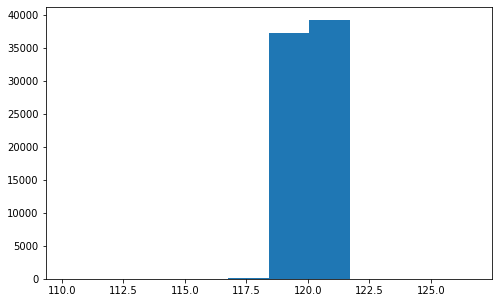

In [20]:
plt.hist(order_11_qd['end_lng'].values)
plt.show()


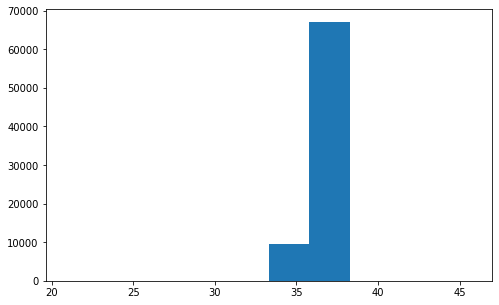

In [21]:
plt.hist(order_11_qd['end_lat'].values)
plt.show()

In [22]:
from datetime import datetime
order_11_qd['duration']=pd.to_datetime(order_11_qd['return_date'])-pd.to_datetime(order_11_qd['load_date'])
# print(type(order_11_qd['duration'][0]))
order_11_qd['duration'] = pd.to_timedelta(order_11_qd['duration'])
order_11_qd['total_seconds'] = order_11_qd['duration'].dt.total_seconds()
order_11_qd.head()

ipykernel_launcher:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,rowid,company_id,plan_no,plan_company_id,trains_no,waybill_no,status,order_no,pick_no,order_wt_no,...,driver_select_flag,driver_select_address,driver_select_lng,driver_select_lat,start_lng,start_lat,end_lng,end_lat,duration,total_seconds
77,1293438,C000000882,DD210208001112,C000065362,C210208001248,YD210208001866,YDZT12,TCDH2101210116,CDH2101210116,NaN,...,NaN,NaN,NaN,NaN,119.337247,35.157347,120.006040,36.322056,0 days 18:21:37,66097.0
186,2438488,C000000882,DD220207000081,C000034775,C220207000014,YD220207002118,YDZT30,TCDH2201260038,CDH2201260038,NaN,...,NaN,NaN,NaN,NaN,119.337247,35.157347,120.199577,36.035815,0 days 08:30:24,30624.0
320,1285109,C000000882,DD210205000223,C000065362,C210205000283,YD210205001275,YDZT12,TCDH2101210063,CDH2101210063,NaN,...,NaN,NaN,NaN,NaN,119.337247,35.157347,120.354561,36.290578,0 days 21:44:18,78258.0
344,2432068,C000000882,DD220204001760,C000005863,C220204000394,YD220204003228,YDZT30,TCDH2201200053,CDH2201200053,NaN,...,NaN,NaN,NaN,NaN,119.337247,35.157347,120.199577,36.035815,0 days 18:34:16,66856.0
364,2433676,C000000882,DD220205000746,C000005265,C220205000174,YD220205002485,YDZT30,TCDH2201210025,CDH2201210025,NaN,...,NaN,NaN,NaN,NaN,119.337247,35.157347,NaN,NaN,0 days 07:25:38,26738.0


In [24]:
order_11_qd = order_11_qd.drop(['end_lng','end_lat','driver_select_flag','driver_select_address','driver_select_lng','driver_select_lat'],axis=1)

In [32]:
print(order_11_qd.columns)

Index(['rowid', 'company_id', 'plan_no', 'plan_company_id', 'trains_no',
       'waybill_no', 'status', 'order_no', 'pick_no', 'source_type',
       'travel_no', 'consignor_company_id', 'settle_company_id',
       'carrier_company_id', 'driver_id', 'consignee_company_id', 'trans_type',
       'start_point', 'end_point', 'price_site', 'flow_id', 'load_date',
       'arrive_date', 'return_date', 'bat_flag', 'product_name',
       'pre_total_weight', 'pre_total_sheet', 'total_weight', 'total_sheet',
       'business_type', 'is_settle', 'settle_flag', 'price_flag', 'price_type',
       'receive_type', 'is_allrate', 'trans_fee', 'unit_price',
       'rcv_unit_price', 'rcv_trans_fee', 'return_bill_date',
       'return_bill_lng', 'return_bill_lat', 'return_bill_address',
       'return_scan_flag', 'return_bill_range', 'return_bill_range_flag',
       'return_bill_exception_pic', 'signing_method', 'is_finish',
       'trans_plan_no', 'main_product_list_no', 'fleet_count',
       'outstock_bil

In [33]:
order_11_qd=order_11_qd.drop(['price_site', 'flow_id','is_allrate', 'trans_fee', 'unit_price','rcv_unit_price','is_finish','trans_plan_no','fleet_count','create_id','update_id','prod_spections','settle_carrier_id','actual_kilo','is_match_act_weight', 'theory_weight',
       'is_confirm_parameter', 'weighbridge_no', 'auter_return_user',
       'auter_return_date', 'loading_date',  'sale_no',
       'sale_total_weight', 'sale_time', 'plat_settle_flag',],axis=1)

In [26]:
order_11_qd = order_11_qd.drop(['check_id', 'check_date','return_pic','finish_state','return_bill_person','contact_name', 'contact_tel'],axis=1)

In [28]:
order_11_qd = order_11_qd.drop(['order_wt_no','plat_settle_flag_name', 'settle_plat_id', 'entry_id','order_plat_settle_flag'],axis=1)

In [31]:
order_11_qd.to_csv("tes.csv")

In [ ]:
order_11_qd = order_11_qd.drop(['order_wt_no','plat_settle_flag_name', 'settle_plat_id', 'entry_id','order_plat_settle_flag'],axis=1)

ipykernel_launcher:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


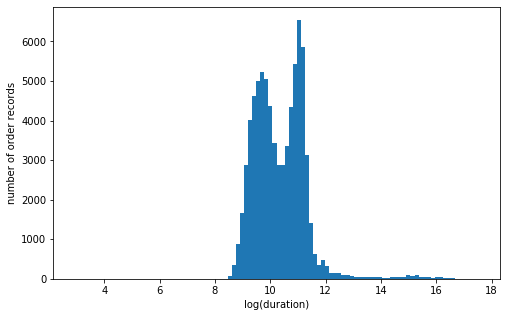

In [23]:
order_11_qd['log_duration'] = np.log(order_11_qd['total_seconds'].values + 1)
plt.hist(order_11_qd['log_duration'].values, bins=100)
plt.xlabel('log(duration)')
plt.ylabel('number of order records')
plt.show()

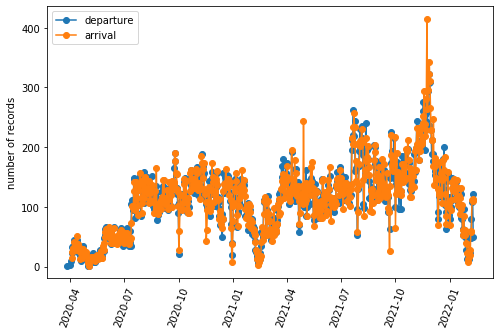

In [38]:
order_11_qd['load_date'] = pd.to_datetime(order_11_qd.load_date)
order_11_qd.loc[:, 'date'] = order_11_qd['load_date'].dt.date
order_11_qd['return_date'] = pd.to_datetime(order_11_qd.return_date)
order_11_qd.loc[:, 'end_date'] = order_11_qd['return_date'].dt.date
# Plot datetime
plt.plot(order_11_qd.groupby('date').count()[['waybill_no']], 'o-',label='departure')
plt.plot(order_11_qd.groupby('end_date').count()[['waybill_no']], 'o-', label='arrival')
plt.legend(loc=0)
# plt.xticks(pd.date_range('2021-11-01','2021-12-01',freq='5d'))
plt.xticks(rotation=70)
plt.ylabel('number of records')
plt.show()

In [5]:
order_11_qd=pd.read_csv("process.csv")

/Users/wangwenqing/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (29,40,43,53) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


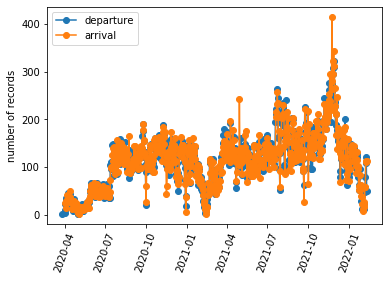

In [7]:
order_11_qd['load_date'] = pd.to_datetime(order_11_qd.load_date)
order_11_qd.loc[:, 'date'] = order_11_qd['load_date'].dt.date
order_11_qd['return_date'] = pd.to_datetime(order_11_qd.return_date)
order_11_qd.loc[:, 'end_date'] = order_11_qd['return_date'].dt.date
# Plot datetime
plt.plot(order_11_qd.groupby('date').count()[['waybill_no']], 'o-',label='departure')
plt.plot(order_11_qd.groupby('end_date').count()[['waybill_no']], 'o-', label='arrival')
plt.legend(loc=0)
# plt.xticks(pd.date_range('2021-11-01','2021-12-01',freq='5d'))
plt.xticks(rotation=70)
plt.ylabel('number of records')
plt.show()

存在运输长达一个月才卸货的订单数据，通过轨迹数据比对查找，进一步处理异常数据，保证数据质量

In [8]:
order_11_qd.loc[:, 'end_month'] = order_11_qd['return_date'].dt.month
order_11_qd.loc[:, 'day'] = order_11_qd['load_date'].dt.day
order_11_qd.loc[:, 'end_day'] = order_11_qd['return_date'].dt.day
abnormal_data=order_11_qd[order_11_qd.end_month==12]
a=abnormal_data[~((abnormal_data.day==30) & (abnormal_data.end_day<3))]
# print(abnormal_data.groupby('truck_no').count()[['waybill_no']])
a

,Unnamed: 0,rowid,company_id,plan_no,plan_company_id,trains_no,waybill_no,status,order_no,pick_no,...,start_lng,start_lat,duration,total_seconds,log_duration,date,end_date,end_month,day,end_day
4025,157467,1141001,C000000882,DD201230000377,C000065362,C201230000337,YD201230000682,YDZT12,TCDH2011250050,CDH2011250050,...,119.337247,35.157347,0 days 23:22:18,84138,11.340225,2020-12-30,2020-12-31,12,30,31
4026,157652,1137294,C000000882,DD201228000788,C000065362,C201228000861,YD201228002483,YDZT12,TCDG2012110009,CDG2012110009,...,119.337247,35.157347,0 days 16:47:07,60427,11.009208,2020-12-28,2020-12-29,12,28,29
4027,157667,1135567,C000000882,DD201228000108,C000065362,C201228000134,YD201228000756,YDZT12,TCDH2012240008,CDH2012240008,...,119.337247,35.157347,0 days 10:44:14,38654,10.562431,2020-12-28,2020-12-28,12,28,28
4084,159771,2288242,C000000882,DD211222003784,C000063975,C211222001760,YD211222004229,YDZT30,TCDX2112210007,CDX2112210007,...,119.337247,35.157347,0 days 07:01:47,25307,10.138876,2021-12-22,2021-12-22,12,22,22
4085,159781,2287703,C000000882,DD211222003721,C000034775,C211222001732,YD211222003690,YDZT30,TCDH2112030051,CDH2112030051,...,119.337247,35.157347,0 days 18:14:35,65675,11.092489,2021-12-22,2021-12-23,12,22,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29080,723885,2233155,C000000882,DD211206000012,C000063524,C211206000007,YD211206001644,YDZT30,TCDX2112030029,CDX2112030029,...,119.337247,35.157347,0 days 07:49:38,28178,10.246332,2021-12-06,2021-12-06,12,6,6
29081,723910,2229834,C000000882,DD211205000383,C000062070,C211205000068,YD211205001925,YDZT30,TCDH2111230090,CDH2111230090,...,119.337247,35.157347,1 days 02:59:07,97147,11.483991,2021-12-05,2021-12-06,12,5,6
37929,872920,997857,C000000882,DD201121001179,C000065362,C201121000947,YD201121002230,YDZT12,TCDH2009270096,CDH2009270096,...,119.337247,35.157347,9 days 23:27:48,862068,13.667091,2020-11-21,2020-12-01,12,21,1
37958,873606,992058,C000000882,DD201119001462,C000054177,C201119001042,YD201119002563,YDZT12,TCDX2011130095,CDX2011130095,...,119.337247,35.157347,13 days 01:50:45,1129845,13.937592,2020-11-19,2020-12-02,12,19,2


In [9]:
order_11_qd=order_11_qd[~order_11_qd.waybill_no.isin(abnormal_data.waybill_no)]
order_11_qd=order_11_qd[~order_11_qd.waybill_no.isin(a.waybill_no)]

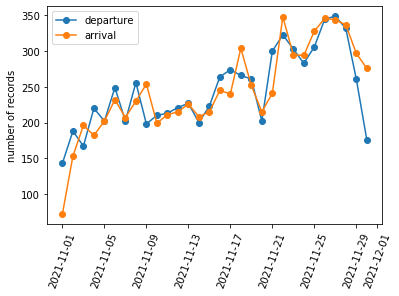

In [68]:
plt.plot(order_11_qd.groupby('date').count()[['waybill_no']], 'o-',label='departure')
plt.plot(order_11_qd.groupby('end_date').count()[['waybill_no']], 'o-', label='arrival')
plt.legend(loc=0)
# plt.xticks(pd.date_range('2021-11-01','2021-12-01',freq='5d'))
plt.xticks(rotation=70)
plt.ylabel('number of records')
plt.show()

In [10]:
df2 = order_11_qd.drop(['end_month','day','end_day'],axis=1)
df2.to_csv('OrderData.csv')
order_11_qd=df2

In [11]:
order_11_qd=order_11_qd.rename(columns={"return_bill_lat":"end_lat","return_bill_lng":"end_lng"})
coords = np.vstack(order_11_qd[['end_lat', 'end_lng']].values)
pca = PCA().fit(coords)
order_11_qd['dest_pca0'] = pca.transform(order_11_qd[['end_lat', 'end_lng']])[:, 0]
order_11_qd['dest_pca1'] = pca.transform(order_11_qd[['end_lat', 'end_lng']])[:, 1]
order_11_qd['start_pca0'] = pca.transform(order_11_qd[['start_lat', 'start_lng']])[:, 0]
order_11_qd['start_pca1'] = pca.transform(order_11_qd[['start_lat', 'start_lng']])[:, 1]

/Users/wangwenqing/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but PCA was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/wangwenqing/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but PCA was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/wangwenqing/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but PCA was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/wangwenqing/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but PCA was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Feature Extraction

In [12]:
order_11_qd=order_11_qd[order_11_qd['end_lng']>100]

Text(0, 0.5, 'pca1')

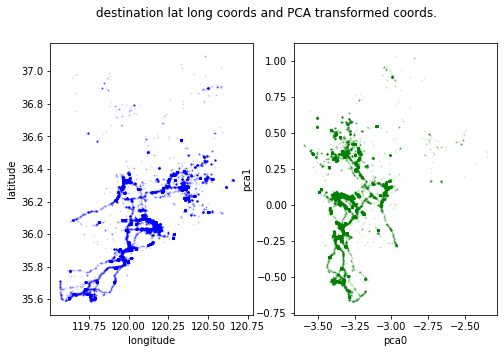

In [15]:
fig, ax = plt.subplots(ncols=2)
ax[0].scatter(order_11_qd['end_lng'].values[:N], order_11_qd['end_lat'].values[:N],
              color='blue', s=1, alpha=0.1)
ax[1].scatter(order_11_qd['dest_pca0'].values[:N], order_11_qd['dest_pca1'].values[:N],
              color='green', s=1, alpha=0.1)
fig.suptitle('destination lat long coords and PCA transformed coords.')
ax[0].set_ylabel('latitude')
ax[0].set_xlabel('longitude')
ax[1].set_xlabel('pca0')
ax[1].set_ylabel('pca1')

In [16]:
# use PCA to transform longitude and latitude coordinates
coords = np.vstack(order_11_qd[['end_lat', 'end_lng']].values)
pca = PCA().fit(coords)
order_11_qd['dest_pca0'] = pca.transform(order_11_qd[['end_lat', 'end_lng']])[:, 0]
order_11_qd['dest_pca1'] = pca.transform(order_11_qd[['end_lat', 'end_lng']])[:, 1]
order_11_qd['start_pca0'] = pca.transform(order_11_qd[['start_lat', 'start_lng']])[:, 0]
order_11_qd['start_pca1'] = pca.transform(order_11_qd[['start_lat', 'start_lng']])[:, 1]


/Users/wangwenqing/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but PCA was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/wangwenqing/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but PCA was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/wangwenqing/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but PCA was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/wangwenqing/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but PCA was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


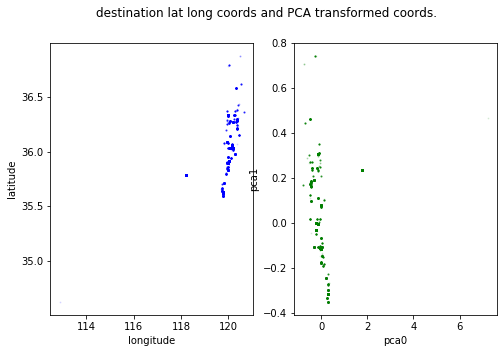

In [84]:
fig, ax = plt.subplots(ncols=2)
ax[0].scatter(order_11_qd['end_lng'].values[:N], order_11_qd['end_lat'].values[:N],
              color='blue', s=1, alpha=0.1)
ax[1].scatter(order_11_qd['dest_pca0'].values[:N], order_11_qd['dest_pca1'].values[:N],
              color='green', s=1, alpha=0.1)
fig.suptitle('destination lat long coords and PCA transformed coords.')
ax[0].set_ylabel('latitude')
ax[0].set_xlabel('longitude')
ax[1].set_xlabel('pca0')
ax[1].set_ylabel('pca1')

plt.show()

In [206]:
# Distance Features
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def dummy_manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_array(lat1, lng1, lat1, lng2)
    b = haversine_array(lat1, lng1, lat2, lng1)
    return a + b

def bearing_array(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

order_11_qd.loc[:, 'distance_haversine'] = haversine_array(order_11_qd['start_lat'].values,order_11_qd['start_lng'].values, order_11_qd['end_lat'].values, order_11_qd['end_lng'].values)
order_11_qd.loc[:, 'distance_dummy_manhattan'] = dummy_manhattan_distance(order_11_qd['start_lat'].values, order_11_qd['start_lng'].values, order_11_qd['end_lat'].values, order_11_qd['end_lng'].values)
order_11_qd.loc[:, 'direction'] = bearing_array(order_11_qd['start_lat'].values, order_11_qd['start_lng'].values, order_11_qd['end_lat'].values, order_11_qd['end_lng'].values)
order_11_qd.loc[:, 'pca_manhattan'] = np.abs(order_11_qd['dest_pca1'] - order_11_qd['start_pca1']) + np.abs(order_11_qd['dest_pca0'] - order_11_qd['start_pca0'])

order_11_qd.loc[:, 'center_latitude'] = (order_11_qd['start_lat'].values + order_11_qd['end_lat'].values) / 2
order_11_qd.loc[:, 'center_longitude'] = (order_11_qd['start_lng'].values + order_11_qd['end_lng'].values) / 2

In [22]:
# Datetime features
order_11_qd.loc[:, 'pickup_weekday'] = order_11_qd['load_date'].dt.weekday
order_11_qd.loc[:, 'pickup_hour_weekofyear'] = order_11_qd['load_date'].dt.weekofyear
order_11_qd.loc[:, 'pickup_hour'] = order_11_qd['load_date'].dt.hour
order_11_qd.loc[:, 'pickup_minute'] = order_11_qd['load_date'].dt.minute
order_11_qd.loc[:, 'pickup_dt'] = (order_11_qd['load_date'] - order_11_qd['load_date'].min()).dt.total_seconds()
order_11_qd.loc[:, 'pickup_week_hour'] = order_11_qd['pickup_weekday'] * 24 + order_11_qd['pickup_hour']

order_11_qd.loc[:, 'dropoff_weekday'] = order_11_qd['return_date'].dt.weekday
order_11_qd.loc[:, 'dropoff_hour_weekofyear'] = order_11_qd['return_date'].dt.weekofyear
order_11_qd.loc[:, 'dropoff_hour'] = order_11_qd['return_date'].dt.hour
order_11_qd.loc[:, 'dropoff_minute'] = order_11_qd['return_date'].dt.minute
order_11_qd.loc[:, 'dropoff_dt'] = (order_11_qd['return_date'] - order_11_qd['return_date'].min()).dt.total_seconds()
order_11_qd.loc[:, 'dropoff_week_hour'] = order_11_qd['dropoff_weekday'] * 24 + order_11_qd['dropoff_hour']

ipykernel_launcher:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
ipykernel_launcher:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


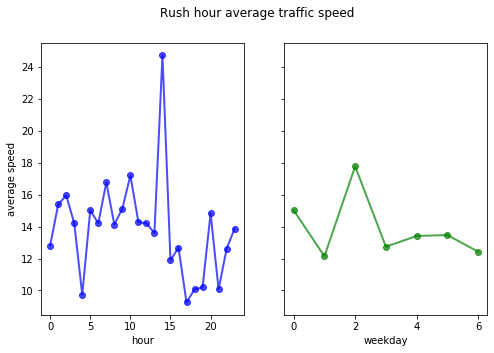

In [49]:
# Speed
order_11_qd.loc[:, 'avg_speed_h'] = 1000 * order_11_qd['distance_haversine'] / order_11_qd['total_seconds']
order_11_qd.loc[:, 'avg_speed_m'] = 1000 * order_11_qd['distance_dummy_manhattan'] / order_11_qd['total_seconds']
fig, ax = plt.subplots(ncols=2, sharey=True)
ax[0].plot(order_11_qd.groupby('pickup_hour').mean()['avg_speed_h'], 'bo-', lw=2, alpha=0.7)
ax[1].plot(order_11_qd.groupby('pickup_weekday').mean()['avg_speed_h'], 'go-', lw=2, alpha=0.7)
# ax[2].plot(order_11_qd.groupby('pickup_week_hour').mean()['avg_speed_h'], 'ro-', lw=2, alpha=0.7)
ax[0].set_xlabel('hour')
ax[1].set_xlabel('weekday')
# ax[2].set_xlabel('weekhour')
ax[0].set_ylabel('average speed')
fig.suptitle('Rush hour average traffic speed')
plt.show()

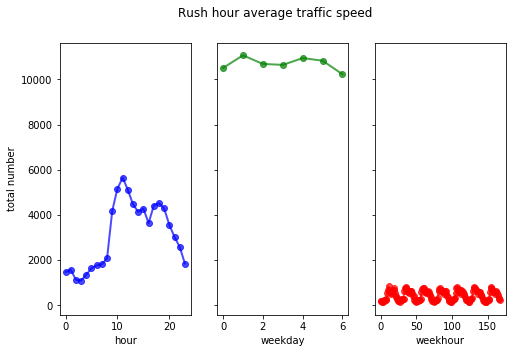

In [149]:

fig, ax = plt.subplots(ncols=3, sharey=True)
ax[0].plot(order_11_qd.groupby('pickup_hour').size(), 'bo-', lw=2, alpha=0.7)
ax[1].plot(order_11_qd.groupby('pickup_weekday').size(), 'go-', lw=2, alpha=0.7)
ax[2].plot(order_11_qd.groupby('pickup_week_hour').size(), 'ro-', lw=2, alpha=0.7)
ax[0].set_xlabel('hour')
ax[1].set_xlabel('weekday')
ax[2].set_xlabel('weekhour')
ax[0].set_ylabel('total number')
fig.suptitle('Rush hour average traffic speed')
plt.show()

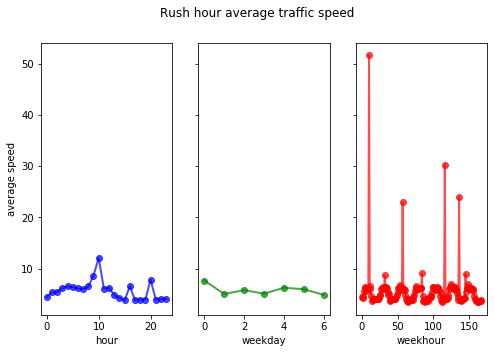

In [23]:
# Speed
order_11_qd.loc[:, 'avg_speed_h'] = 1000 * order_11_qd['distance_haversine'] / order_11_qd['total_seconds']
order_11_qd.loc[:, 'avg_speed_m'] = 1000 * order_11_qd['distance_dummy_manhattan'] / order_11_qd['total_seconds']
fig, ax = plt.subplots(ncols=3, sharey=True)
ax[0].plot(order_11_qd.groupby('pickup_hour').mean()['avg_speed_h'], 'bo-', lw=2, alpha=0.7)
ax[1].plot(order_11_qd.groupby('pickup_weekday').mean()['avg_speed_h'], 'go-', lw=2, alpha=0.7)
ax[2].plot(order_11_qd.groupby('pickup_week_hour').mean()['avg_speed_h'], 'ro-', lw=2, alpha=0.7)
ax[0].set_xlabel('hour')
ax[1].set_xlabel('weekday')
ax[2].set_xlabel('weekhour')
ax[0].set_ylabel('average speed')
fig.suptitle('Rush hour average traffic speed')
plt.show()

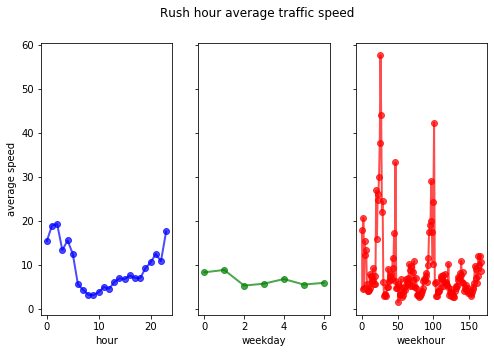

In [104]:

fig, ax = plt.subplots(ncols=3, sharey=True)
ax[0].plot(order_11_qd.groupby('dropoff_hour').mean()['avg_speed_h'], 'bo-', lw=2, alpha=0.7)
ax[1].plot(order_11_qd.groupby('dropoff_weekday').mean()['avg_speed_h'], 'go-', lw=2, alpha=0.7)
ax[2].plot(order_11_qd.groupby('dropoff_week_hour').mean()['avg_speed_h'], 'ro-', lw=2, alpha=0.7)
ax[0].set_xlabel('hour')
ax[1].set_xlabel('weekday')
ax[2].set_xlabel('weekhour')
ax[0].set_ylabel('average speed')
fig.suptitle('Rush hour average traffic speed')
plt.show()

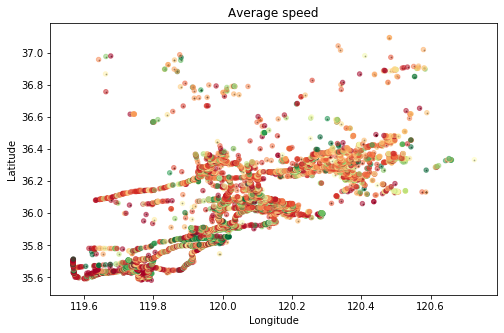

In [24]:
order_processed=order_11_qd[order_11_qd['end_lng']>100]
order_processed.loc[:, 'dropoff_lat_bin'] = np.round(order_processed['end_lat'], 3)
order_processed.loc[:, 'dropoff_long_bin'] = np.round(order_processed['end_lng'], 3)
# Average speed for regions
gby_cols = ['dropoff_lat_bin', 'dropoff_long_bin']
coord_speed = order_processed.groupby(gby_cols).mean()[['avg_speed_h']].reset_index()
coord_count = order_processed.groupby(gby_cols).count()[['waybill_no']].reset_index()
coord_stats = pd.merge(coord_speed, coord_count, on=gby_cols)
# coord_stats = coord_stats[coord_stats['row_id'] > 100]
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(order_processed.end_lng.values[:N], order_processed.end_lat.values[:N],
           color='black', s=1, alpha=0.5)
ax.scatter(coord_stats.dropoff_long_bin.values, coord_stats.dropoff_lat_bin.values,
           c=coord_stats.avg_speed_h.values,
           cmap='RdYlGn', s=20, alpha=0.5, vmin=1, vmax=8)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Average speed')
plt.show()

order_processed.loc[:, 'dropoff_lat_bin'] = np.round(order_processed['end_lat'], 2)
order_processed.loc[:, 'dropoff_long_bin'] = np.round(order_processed['end_lng'], 2)
order_processed.loc[:, 'center_lat_bin'] = np.round(order_processed['center_latitude'], 2)
order_processed.loc[:, 'center_long_bin'] = np.round(order_processed['center_longitude'], 2)
order_processed.loc[:, 'dropoff_dt_bin'] = (order_processed['dropoff_dt'] // (3 * 3600))

/Users/wangwenqing/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


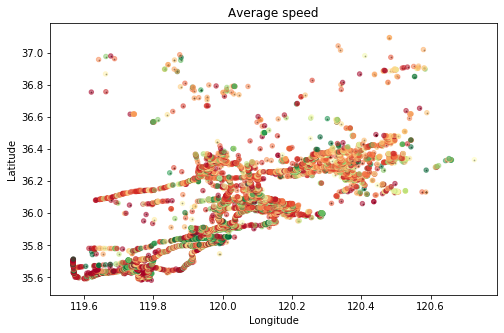

In [57]:

order_11_qd.loc[:, 'dropoff_lat_bin'] = np.round(order_11_qd['end_lat'], 3)
order_11_qd.loc[:, 'dropoff_long_bin'] = np.round(order_11_qd['end_lng'], 3)
# Average speed for regions
gby_cols = ['dropoff_lat_bin', 'dropoff_long_bin']
coord_speed = order_11_qd.groupby(gby_cols).mean()[['avg_speed_h']].reset_index()
coord_count = order_11_qd.groupby(gby_cols).count()[['waybill_no']].reset_index()
coord_stats = pd.merge(coord_speed, coord_count, on=gby_cols)
# coord_stats = coord_stats[coord_stats['row_id'] > 100]
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(order_11_qd.end_lng.values[:N], order_11_qd.end_lat.values[:N],
           color='black', s=1, alpha=0.5)
ax.scatter(coord_stats.dropoff_long_bin.values, coord_stats.dropoff_lat_bin.values,
           c=coord_stats.avg_speed_h.values,
           cmap='RdYlGn', s=20, alpha=0.5, vmin=1, vmax=8)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Average speed')
plt.show()

order_11_qd.loc[:, 'dropoff_lat_bin'] = np.round(order_11_qd['end_lat'], 2)
order_11_qd.loc[:, 'dropoff_long_bin'] = np.round(order_11_qd['end_lng'], 2)
order_11_qd.loc[:, 'center_lat_bin'] = np.round(order_11_qd['center_latitude'], 2)
order_11_qd.loc[:, 'center_long_bin'] = np.round(order_11_qd['center_longitude'], 2)
order_11_qd.loc[:, 'dropoff_dt_bin'] = (order_11_qd['dropoff_dt'] // (3 * 3600))


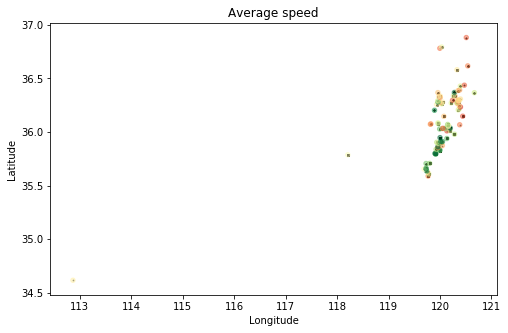

In [105]:
order_11_qd.loc[:, 'dropoff_lat_bin'] = np.round(order_11_qd['end_lat'], 3)
order_11_qd.loc[:, 'dropoff_long_bin'] = np.round(order_11_qd['end_lng'], 3)
# Average speed for regions
gby_cols = ['dropoff_lat_bin', 'dropoff_long_bin']
coord_speed = order_11_qd.groupby(gby_cols).mean()[['avg_speed_h']].reset_index()
coord_count = order_11_qd.groupby(gby_cols).count()[['waybill_no']].reset_index()
coord_stats = pd.merge(coord_speed, coord_count, on=gby_cols)
# coord_stats = coord_stats[coord_stats['row_id'] > 100]
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(order_11_qd.end_lng.values[:N], order_11_qd.end_lat.values[:N],
           color='black', s=1, alpha=0.5)
ax.scatter(coord_stats.dropoff_long_bin.values, coord_stats.dropoff_lat_bin.values,
           c=coord_stats.avg_speed_h.values,
           cmap='RdYlGn', s=20, alpha=0.5, vmin=1, vmax=8)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Average speed')
plt.show()

order_11_qd.loc[:, 'dropoff_lat_bin'] = np.round(order_11_qd['end_lat'], 2)
order_11_qd.loc[:, 'dropoff_long_bin'] = np.round(order_11_qd['end_lng'], 2)
order_11_qd.loc[:, 'center_lat_bin'] = np.round(order_11_qd['center_latitude'], 2)
order_11_qd.loc[:, 'center_long_bin'] = np.round(order_11_qd['center_longitude'], 2)
order_11_qd.loc[:, 'dropoff_dt_bin'] = (order_11_qd['dropoff_dt'] // (3 * 3600))


In [45]:
# Clustering
sample_ind = np.random.permutation(len(coords))[:500000]
kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10000).fit(coords[sample_ind])

In [46]:
order_11_qd.loc[:, 'dropoff_cluster'] = kmeans.predict(order_11_qd[['end_lat', 'end_lng']])
t1 = dt.datetime.now()

/Users/wangwenqing/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but MiniBatchKMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


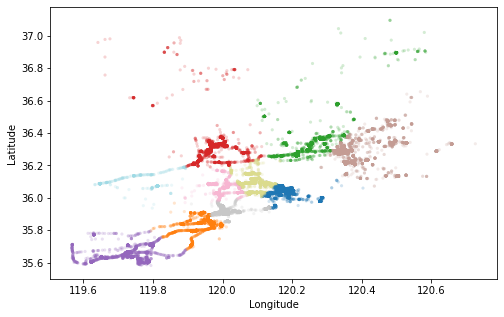

In [47]:
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(order_11_qd.end_lng.values[:N], order_11_qd.end_lat.values[:N], s=10, lw=0,
           c=order_11_qd.dropoff_cluster[:N].values, cmap='tab20', alpha=0.2)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

In [111]:
order_11_qd.head(2)

,Unnamed: 0,waybill_no,status,truck_no,trans_type,start_point,end_point,load_date,return_date,start_lng,...,dropoff_lat_bin,dropoff_long_bin,dropoff_weekday,dropoff_hour_weekofyear,dropoff_hour,dropoff_minute,dropoff_dt,dropoff_week_hour,dropoff_dt_bin,dropoff_cluster
0,52,YD211101001465,YDZT30,鲁LE7632,YSLX10,P000000984,P000051729,2021-11-01 01:52:00,2021-11-01 11:44:29,119.337247,...,36.33,120.01,0,44,11,44,11822.0,11,1.0,60
1,54,YD211101001469,YDZT30,鲁L17303,YSLX10,P000000984,P000051729,2021-11-01 01:54:20,2021-11-01 13:42:36,119.337247,...,36.33,120.01,0,44,13,42,18909.0,13,1.0,60


In [25]:
order_11_qd['address_district']=order_11_qd['return_bill_address'].str[6:9]

In [313]:
original=['rowid', 'end_point', 'load_date',  'return_date','end_lng', 'end_lat','start_lng', 'start_lat',
       'duration',  'log_duration', 'date', 'end_date',
       'dest_pca0', 'dest_pca1', 'total_seconds',
       'distance_haversine', 'distance_dummy_manhattan', 'direction',
       'pca_manhattan', 
       'pickup_weekday', 'pickup_hour_weekofyear', 'pickup_hour',
       'pickup_minute', 'pickup_dt', 'pickup_week_hour', 'dropoff_weekday',
       'dropoff_hour_weekofyear', 'dropoff_hour', 'dropoff_minute',
       'dropoff_dt', 'dropoff_week_hour','back_weekday',
       'back_hour_weekofyear', 'back_hour', 'back_minute',
       'back_dt', 'back_week_hour', 'avg_speed_h', 'avg_speed_m',
        'center_lat_bin',
       'center_long_bin',  'travel_no','product_name','address_district']

In [314]:
feature_names = list(order_11_qd.columns)
# print(np.setdiff1d(original.columns, test.columns))
do_not_use_for_training = ['rowid', 'duration','log_duration', 'datetime', 'date',
                           'pickup_date', 'avg_speed_h', 'avg_speed_m', 'duration',
                           'pickup_lat_bin', 'pickup_long_bin','start_lng', 'start_lat',
                           'center_lat_bin', 'center_long_bin',
                           'pickup_dt_bin', 'pickup_datetime_group', 'diff','log_diff','load_date','date','return_date','end_date']
feature_names = [f for f in original if f not in do_not_use_for_training]
# print(feature_names)
print('We have %i features.' % len(feature_names))
# y = np.log(train['total_seconds'].values + 1)
y = np.log(train['total_time'].values + 1)
t1 = dt.datetime.now()

We have 31 features.


In [315]:
print(feature_names)

['end_point', 'end_lng', 'end_lat', 'dest_pca0', 'dest_pca1', 'total_seconds', 'distance_haversine', 'distance_dummy_manhattan', 'direction', 'pca_manhattan', 'pickup_weekday', 'pickup_hour_weekofyear', 'pickup_hour', 'pickup_minute', 'pickup_dt', 'pickup_week_hour', 'dropoff_weekday', 'dropoff_hour_weekofyear', 'dropoff_hour', 'dropoff_minute', 'dropoff_dt', 'dropoff_week_hour', 'back_weekday', 'back_hour_weekofyear', 'back_hour', 'back_minute', 'back_dt', 'back_week_hour', 'travel_no', 'product_name', 'address_district']


In [88]:
order_11_qd=order_11_qd.sort_values(by=['travel_no','load_date'],ascending=[False,True])

In [81]:
data['load_date'].head()

5746    2022-01-09 08:43:00
68056   2020-04-10 19:44:00
60110   2020-04-18 23:24:00
71668   2020-04-25 00:15:00
68046   2020-04-26 19:48:00
Name: load_date, dtype: datetime64[ns]

In [89]:
order_11_qd['load_date_1']=order_11_qd['load_date'].shift(1)
order_11_qd['total']=order_11_qd['load_date']-order_11_qd['load_date_1']

In [125]:
order_11_qd['total_time']=order_11_qd['total'].dt.total_seconds()

In [128]:
order_11_qd=order_11_qd[(0<order_11_qd['total_time'])&(order_11_qd['total_time']<864000)]

In [95]:
data.head()

,Unnamed: 0,rowid,company_id,plan_no,plan_company_id,trains_no,waybill_no,status,order_no,pick_no,...,dropoff_hour_weekofyear,dropoff_hour,dropoff_minute,dropoff_dt,dropoff_week_hour,address_district,dropoff_cluster,load_date_1,total,total_time
60110,1281270,437934,C000000882,DD200418001069,C000005122,NaN,YD200418002006,YDZT12,TCDR2004100037,CDR2004100037,...,16,8,28,1385160.0,152,城阳区,2,2020-04-10 19:44:00,8 days 03:40:00,704400.0
71668,1606410,449524,C000000882,DD200424000301,C000005122,NaN,YD200425000012,YDZT12,TCDR2004070014,CDR2004070014,...,17,13,21,1921140.0,133,即墨区,2,2020-04-18 23:24:00,6 days 00:51:00,521460.0
68046,1476498,452995,C000000882,DD200426000463,C000005122,NaN,YD200426001588,YDZT12,TCDR2004080059,CDR2004080059,...,18,7,5,2071380.0,7,即墨区,2,2020-04-25 00:15:00,1 days 19:33:00,156780.0
75531,1756253,453062,C000000882,DD200426001263,C000005122,NaN,YD200426001655,YDZT12,TCDR2004080059,CDR2004080059,...,18,8,19,2075820.0,8,即墨区,2,2020-04-23 21:34:00,2 days 23:01:00,255660.0
67643,1459727,499290,C000000882,DD200521001557,C000005122,NaN,YD200521001813,YDZT12,TCDR2005150015,CDR2005150015,...,21,7,2,4231200.0,103,城阳区,2,2020-05-16 00:36:00,5 days 21:35:00,509700.0


In [130]:
order_11_qd['end_dt']=order_11_qd['load_date_1'].dt.date

ipykernel_launcher:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [126]:
order_11_qd.loc[:, 'back_weekday'] = order_11_qd['load_date_1'].dt.weekday
order_11_qd.loc[:, 'back_hour_weekofyear'] = order_11_qd['load_date_1'].dt.weekofyear
order_11_qd.loc[:, 'back_hour'] = order_11_qd['load_date_1'].dt.hour
order_11_qd.loc[:, 'back_minute'] = order_11_qd['load_date_1'].dt.minute
order_11_qd.loc[:, 'back_dt'] = (order_11_qd['load_date_1'] - order_11_qd['load_date_1'].min()).dt.total_seconds()
order_11_qd.loc[:, 'back_week_hour'] = order_11_qd['back_weekday'] * 24 + order_11_qd['back_hour']

ipykernel_launcher:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


In [226]:
order_11_qd['start_day_name'] = order_11_qd.load_date.dt.day_name()

In [225]:
order_11_qd['end_day_name'] = order_11_qd.load_date_1.dt.day_name()

In [227]:
order_11_qd.head()

,Unnamed: 0,rowid,company_id,plan_no,plan_company_id,trains_no,waybill_no,status,order_no,pick_no,...,total_time,back_weekday,back_hour_weekofyear,back_hour,back_minute,back_dt,back_week_hour,end_dt,start_day_name,end_day_name
60110,1281270,437934,C000000882,DD200418001069,C000005122,NaN,YD200418002006,YDZT12,TCDR2004100037,CDR2004100037,...,704400.0,4.0,15.0,19.0,44.0,1255860.0,115.0,2020-04-10,Saturday,Friday
71668,1606410,449524,C000000882,DD200424000301,C000005122,NaN,YD200425000012,YDZT12,TCDR2004070014,CDR2004070014,...,521460.0,5.0,16.0,23.0,24.0,1960260.0,143.0,2020-04-18,Saturday,Saturday
68046,1476498,452995,C000000882,DD200426000463,C000005122,NaN,YD200426001588,YDZT12,TCDR2004080059,CDR2004080059,...,156780.0,5.0,17.0,0.0,15.0,2481720.0,120.0,2020-04-25,Sunday,Saturday
75531,1756253,453062,C000000882,DD200426001263,C000005122,NaN,YD200426001655,YDZT12,TCDR2004080059,CDR2004080059,...,255660.0,3.0,17.0,21.0,34.0,2385660.0,93.0,2020-04-23,Sunday,Thursday
67643,1459727,499290,C000000882,DD200521001557,C000005122,NaN,YD200521001813,YDZT12,TCDR2005150015,CDR2005150015,...,509700.0,5.0,20.0,0.0,36.0,4297380.0,120.0,2020-05-16,Thursday,Saturday


Model

In [266]:
data=order_11_qd
data:pd.DataFrame = data.sample(frac=1.0)                     #将数据打乱
rows, cols = data.shape
split_index_1 = int(rows * 0.2)
split_index_2 = int(rows * 0.4)
#数据分割
test:pd.DataFrame = data.iloc[0: split_index_1, :]
# validate:pd.DataFrame = data.iloc[split_index_1:split_index_2, :]
# train:pd.DataFrame = data.iloc[split_index_2: rows, :]
train:pd.DataFrame = data.iloc[split_index_1: rows, :]
#数据保存
# test.to_csv("corpus-model-filtered-test.csv")
# validate.to_csv("corpus-model-filtered-validate.csv")
# train.to_csv("corpus-model-filtered-train.csv")
# test.to_csv("test.csv")
# validate.to_csv("validate.csv")
# train.to_csv("train.csv")
# 来回总时间
# test.to_csv("test1.csv")
# validate.to_csv("validate1.csv")
# train.to_csv("train1.csv")
test.to_csv("test2.csv")
train.to_csv("train2.csv")
print("划分完毕")


划分完毕


In [267]:
# 字符串转数字
listType = train['end_point'].unique()
print(listType)

['P000051729' 'P000043918' 'P000017764' ... 'P000017908' 'P000001805'
 'P000066260']


In [268]:
dic = dict.fromkeys(listType)
for i in range(len(listType)):
    dic[listType[i]] = i
train['end_point']= train['end_point'].map(dic)



ipykernel_launcher:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [269]:
listType = test['end_point'].unique()
dic = dict.fromkeys(listType)
for i in range(len(listType)):
    dic[listType[i]] = i
test['end_point']= test['end_point'].map(dic)

ipykernel_launcher:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [270]:
lists = test['travel_no'].unique()
dic = dict.fromkeys(lists)
for i in range(len(lists)):
    dic[lists[i]] = i
test['travel_no']= test['travel_no'].map(dic)


ipykernel_launcher:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [271]:
listType = train['travel_no'].unique()
dic = dict.fromkeys(listType)
for i in range(len(listType)):
    dic[listType[i]] = i
train['travel_no']= train['travel_no'].map(dic)

ipykernel_launcher:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [272]:
listType = train['product_name'].unique()
dic = dict.fromkeys(listType)
for i in range(len(listType)):
    dic[listType[i]] = i
train['product_name']= train['product_name'].map(dic)

ipykernel_launcher:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [273]:
listType = test['product_name'].unique()
dic = dict.fromkeys(listType)
for i in range(len(listType)):
    dic[listType[i]] = i
test['product_name']= test['product_name'].map(dic)

ipykernel_launcher:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [274]:
listType = test['address_district'].unique()
dic = dict.fromkeys(listType)
for i in range(len(listType)):
    dic[listType[i]] = i
test['address_district']= test['address_district'].map(dic)
listType = train['address_district'].unique()
dic = dict.fromkeys(listType)
for i in range(len(listType)):
    dic[listType[i]] = i
train['address_district']= train['address_district'].map(dic)

ipykernel_launcher:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [241]:
listType = test['start_day_name'].unique()
dic = dict.fromkeys(listType)
for i in range(len(listType)):
    dic[listType[i]] = i
test['start_day_name']= test['start_day_name'].map(dic)
listType = train['start_day_name'].unique()
dic = dict.fromkeys(listType)
for i in range(len(listType)):
    dic[listType[i]] = i
train['start_day_name']= train['start_day_name'].map(dic)

ipykernel_launcher:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [242]:
listType = test['end_day_name'].unique()
dic = dict.fromkeys(listType)
for i in range(len(listType)):
    dic[listType[i]] = i
test['end_day_name']= test['end_day_name'].map(dic)
listType = train['end_day_name'].unique()
dic = dict.fromkeys(listType)
for i in range(len(listType)):
    dic[listType[i]] = i
train['end_day_name']= train['end_day_name'].map(dic)

ipykernel_launcher:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [303]:
Xtr, Xv, ytr, yv = train_test_split(train[feature_names].values, y)
dtrain = xgb.DMatrix(Xtr, label=ytr)
dvalid = xgb.DMatrix(Xv, label=yv)
dtest = xgb.DMatrix(test[feature_names].values)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

In [281]:
xgb_pars = []
for MCW in [10, 20, 50, 75, 100]:
    for ETA in [0.05, 0.1, 0.15]:
        for CS in [0.3, 0.4, 0.5]:
            for MD in [6, 8, 10, 12, 15]:
                for SS in [0.5, 0.6, 0.7, 0.8, 0.9]:
                    for LAMBDA in [0.5, 1., 1.5,  2., 3.]:
                        xgb_pars.append({'min_child_weight': MCW, 'eta': ETA, 
                                         'colsample_bytree': CS, 'max_depth': MD,
                                         'subsample': SS, 'lambda': LAMBDA, 
                                         'nthread': -1, 'booster' : 'gbtree', 'eval_metric': 'rmse',
                                         'silent': 1, 'objective': 'reg:linear'})

for _ in range(20):
    xgb_par = np.random.choice(xgb_pars, 1)[0]
    print(xgb_par)
    model = xgb.train(xgb_par, dtrain, 2000, watchlist, early_stopping_rounds=50,
                      maximize=False, verbose_eval=100)
    print('Modeling RMSLE %.5f' % model.best_score)


{'min_child_weight': 100, 'eta': 0.05, 'colsample_bytree': 0.4, 'max_depth': 10, 'subsample': 0.5, 'lambda': 3.0, 'nthread': -1, 'booster': 'gbtree', 'eval_metric': 'rmse', 'silent': 1, 'objective': 'reg:linear'}
[12:36:42] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[12:36:42] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-rmse:10.63463	valid-rmse:10.62645


/Users/wangwenqing/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:528: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  format(", ".join(args_msg)), FutureWarning


[100]	train-rmse:0.72539	valid-rmse:0.74857
[200]	train-rmse:0.56321	valid-rmse:0.60884
[300]	train-rmse:0.50469	valid-rmse:0.56835
[400]	train-rmse:0.47963	valid-rmse:0.55628
[500]	train-rmse:0.45753	valid-rmse:0.54509
[600]	train-rmse:0.43910	valid-rmse:0.53794
[700]	train-rmse:0.42156	valid-rmse:0.53054
[800]	train-rmse:0.40750	valid-rmse:0.52601
[900]	train-rmse:0.39280	valid-rmse:0.52063
[1000]	train-rmse:0.38067	valid-rmse:0.51739
[1100]	train-rmse:0.36877	valid-rmse:0.51405
[1200]	train-rmse:0.35725	valid-rmse:0.50994
[1300]	train-rmse:0.34698	valid-rmse:0.50740
[1400]	train-rmse:0.33633	valid-rmse:0.50440
[1500]	train-rmse:0.32732	valid-rmse:0.50161
[1600]	train-rmse:0.31886	valid-rmse:0.49952
[1700]	train-rmse:0.31096	valid-rmse:0.49811
[1800]	train-rmse:0.30185	valid-rmse:0.49495
[1900]	train-rmse:0.29312	valid-rmse:0.49207
[1999]	train-rmse:0.28540	valid-rmse:0.49060
Modeling RMSLE 0.49058
{'min_child_weight': 50, 'eta': 0.15, 'colsample_bytree': 0.4, 'max_depth': 10, 'subsa

In [317]:
Xtr, Xv, ytr, yv = train_test_split(train[feature_names].values, y)
dtrain = xgb.DMatrix(Xtr, label=ytr)
dvalid = xgb.DMatrix(Xv, label=yv)
dtest = xgb.DMatrix(test[feature_names].values)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

In [318]:
xgb_pars={'min_child_weight': 10, 'eta': 0.05, 'colsample_bytree': 0.5, 'max_depth': 6, 'subsample': 0.9, 'lambda': 1.5, 'nthread': -1, 'booster': 'gbtree', 'eval_metric': 'rmse', 'silent': 1, 'objective': 'reg:linear'}
model = xgb.train(xgb_pars, dtrain, 2000, watchlist, early_stopping_rounds=50,
                  maximize=False, verbose_eval=100)
print('Modeling RMSLE %.5f' % model.best_score)

[14:28:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-rmse:10.62906	valid-rmse:10.64283
[100]	train-rmse:0.77136	valid-rmse:0.80451
[200]	train-rmse:0.59883	valid-rmse:0.65239
[300]	train-rmse:0.48881	valid-rmse:0.56134
[400]	train-rmse:0.43001	valid-rmse:0.51943
[500]	train-rmse:0.39452	valid-rmse:0.49693
[600]	train-rmse:0.36563	valid-rmse:0.48104
[700]	train-rmse:0.34185	valid-rmse:0.

In [304]:
xgb_pars={'min_child_weight': 10, 'eta': 0.05, 'colsample_bytree': 0.5, 'max_depth': 6, 'subsample': 0.9, 'lambda': 1.5, 'nthread': -1, 'booster': 'gbtree', 'eval_metric': 'rmse', 'silent': 1, 'objective': 'reg:linear'}
model = xgb.train(xgb_pars, dtrain, 2000, watchlist, early_stopping_rounds=50,
                  maximize=False, verbose_eval=100)
print('Modeling RMSLE %.5f' % model.best_score)

[14:04:56] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:04:56] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-rmse:10.63795	valid-rmse:10.61467
[100]	train-rmse:0.77764	valid-rmse:0.79823
[200]	train-rmse:0.62562	valid-rmse:0.66514
[300]	train-rmse:0.49670	valid-rmse:0.55426
[400]	train-rmse:0.43507	valid-rmse:0.50962
[500]	train-rmse:0.39987	valid-rmse:0.48881
[600]	train-rmse:0.36972	valid-rmse:0.47268
[700]	train-rmse:0.34225	valid-rmse:0.

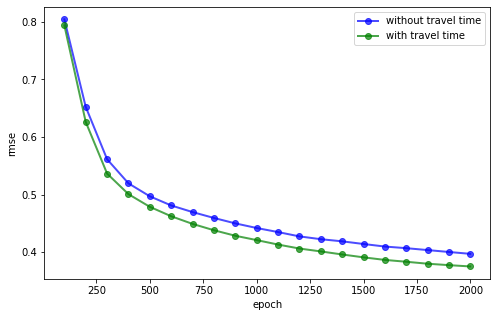

In [326]:
import matplotlib.pyplot as plt
batch_size=[10,20,40]
loss_10=[0.80451,0.65239,0.56134,0.51943,0.49693,0.48104
,0.46953,0.45931,0.44990,0.44186,0.43480,0.42730,0.42242,0.41870,0.41407
,0.40964,0.40681,0.40351,0.40019,0.39698]
loss_20=[ 0.79403,0.62616,0.53642,0.50067,0.47865
,0.46227,0.44899,0.43797,0.42839,0.42084,0.41310,0.40619
,0.40116,0.39587,0.39086,0.38641,0.38321,0.37979,0.37731,0.37506]
x=[100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,1999]
plt.plot(x,loss_10, 'bo-', lw=2, alpha=0.7,label='without travel time')
plt.plot(x,loss_20, 'go-', lw=2, alpha=0.7,label='with travel time')
plt.legend()
# plt.xticks(x,labels,rotation='vertical')
plt.xlabel('epoch')
plt.ylabel('rmse')
plt.show()

不包含total seconds的版本

In [292]:
xgb_pars={'min_child_weight': 10, 'eta': 0.05, 'colsample_bytree': 0.5, 'max_depth': 6, 'subsample': 0.9, 'lambda': 1.5, 'nthread': -1, 'booster': 'gbtree', 'eval_metric': 'rmse', 'silent': 1, 'objective': 'reg:linear'}
model = xgb.train(xgb_pars, dtrain, 2000, watchlist, early_stopping_rounds=50,
                  maximize=False, verbose_eval=100)
print('Modeling RMSLE %.5f' % model.best_score)

[13:40:58] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[13:40:58] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-rmse:10.62956	valid-rmse:10.64192
[100]	train-rmse:0.76694	valid-rmse:0.79403
[200]	train-rmse:0.58517	valid-rmse:0.62616
[300]	train-rmse:0.48044	valid-rmse:0.53642
[400]	train-rmse:0.43148	valid-rmse:0.50067
[500]	train-rmse:0.39573	valid-rmse:0.47865
[600]	train-rmse:0.36802	valid-rmse:0.46227
[700]	train-rmse:0.34288	valid-rmse:0.

Feature importance analysis

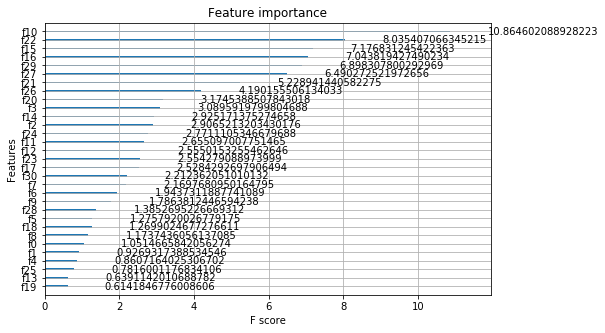

In [350]:
# xgb.plot_importance(model,importance_type='gain')
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(model,importance_type='gain')
pyplot.show()

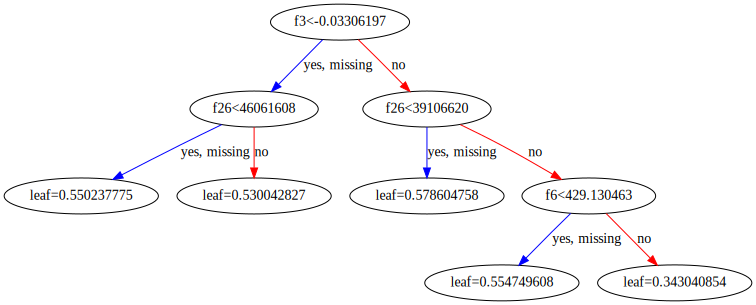

In [345]:
import graphviz
xgb.to_graphviz(model,num_trees=0)

In [351]:
feature_importance_dict=model.get_score(fmap='', importance_type='gain')
# feature_importance_dict = model.get_fscore()
fs = ['f%i' % i for i in range(len(feature_names))]
f1 = pd.DataFrame({'f': list(feature_importance_dict.keys()),
                   'importance': list(feature_importance_dict.values())})
f2 = pd.DataFrame({'f': fs, 'feature_name': feature_names})
feature_importance = pd.merge(f1, f2, how='right', on='f')
feature_importance = feature_importance.fillna(0)

feature_importance[['feature_name', 'importance']].sort_values(by='importance', ascending=False)

,feature_name,importance
10,pickup_weekday,10.864602
22,back_weekday,8.035407
15,pickup_week_hour,7.176831
16,dropoff_weekday,7.043819
29,product_name,6.898308
27,back_week_hour,6.490273
21,dropoff_week_hour,5.228941
26,back_dt,4.190156
20,dropoff_dt,3.174539
3,dest_pca0,3.089592


In [348]:
feature_importance_dict=model.get_score(fmap='', importance_type='weight')
# feature_importance_dict = model.get_fscore()
fs = ['f%i' % i for i in range(len(feature_names))]
f1 = pd.DataFrame({'f': list(feature_importance_dict.keys()),
                   'importance': list(feature_importance_dict.values())})
f2 = pd.DataFrame({'f': fs, 'feature_name': feature_names})
feature_importance = pd.merge(f1, f2, how='right', on='f')
feature_importance = feature_importance.fillna(0)

feature_importance[['feature_name', 'importance']].sort_values(by='importance', ascending=False)

,feature_name,importance
26,back_dt,5961.0
14,pickup_dt,5634.0
27,back_week_hour,5241.0
5,total_seconds,4458.0
15,pickup_week_hour,4193.0
20,dropoff_dt,3785.0
28,travel_no,3729.0
4,dest_pca1,2650.0
2,end_lat,2631.0
23,back_hour_weekofyear,2570.0


<Figure size 720x468 with 0 Axes>

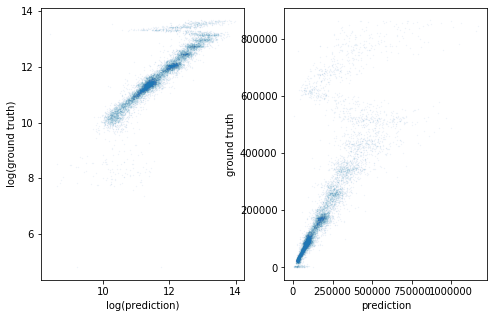

In [356]:
ypred = model.predict(dvalid)
plt.figure(figsize=(10,6.5))
fig,ax = plt.subplots(ncols=2)
ax[0].scatter(ypred, yv, s=0.1, alpha=0.1)
ax[0].set_xlabel('log(prediction)')
ax[0].set_ylabel('log(ground truth)')
ax[1].scatter(np.exp(ypred), np.exp(yv), s=0.1, alpha=0.1)
ax[1].set_xlabel('prediction')
ax[1].set_ylabel('ground truth')
plt.show()

In [285]:
from sklearn.metrics import mean_squared_error
score = np.sqrt(mean_squared_error(np.exp(ypred), np.exp(yv)))
print(score)
print(len(ypred))

101714.20320483734
10752


In [286]:
ytest = model.predict(dtest)
print('Test shape OK.') if test.shape[0] == ytest.shape[0] else print('Oops')
test['duration'] = np.exp(ytest) - 1

Test shape OK.


ipykernel_launcher:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Valid prediction mean: 11.633
Test prediction mean: 11.652


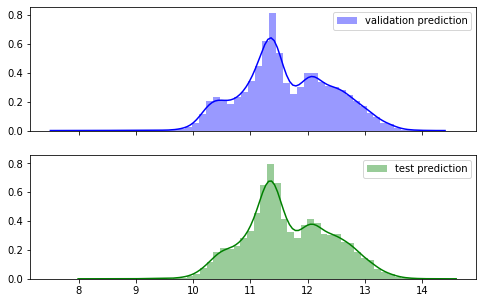

Total time: 54607 seconds


In [287]:
# test[['rowid', 'duration']].to_csv('yingying_submission_5000.csv', index=False)

print('Valid prediction mean: %.3f' % ypred.mean())
print('Test prediction mean: %.3f' % ytest.mean())

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
sns.distplot(ypred, ax=ax[0], color='blue', label='validation prediction')
sns.distplot(ytest, ax=ax[1], color='green', label='test prediction')
ax[0].legend(loc=0)
ax[1].legend(loc=0)
plt.show()

t1 = dt.datetime.now()
print('Total time: %i seconds' % (t1 - t0).seconds)

In [107]:
# small: min_child_weight, eta
# large: subsample
xgb_pars = []
for MCW in [10, 20, 50, 75, 100]:
    for ETA in [0.05, 0.1, 0.15]:
        for CS in [0.3, 0.4, 0.5]:
            for MD in [6, 8, 10, 12, 15]:
                for SS in [0.5, 0.6, 0.7, 0.8, 0.9]:
                    for LAMBDA in [0.5, 1., 1.5,  2., 3.]:
                        xgb_pars.append({'min_child_weight': MCW, 'eta': ETA, 
                                         'colsample_bytree': CS, 'max_depth': MD,
                                         'subsample': SS, 'lambda': LAMBDA, 
                                         'nthread': -1, 'booster' : 'gbtree', 'eval_metric': 'rmse',
                                         'silent': 1, 'objective': 'reg:linear'})

for _ in range(20):
    xgb_par = np.random.choice(xgb_pars, 1)[0]
    print(xgb_par)
    model = xgb.train(xgb_par, dtrain, 2000, watchlist, early_stopping_rounds=50,
                      maximize=False, verbose_eval=100)
    print('Modeling RMSLE %.5f' % model.best_score)

{'min_child_weight': 20, 'eta': 0.05, 'colsample_bytree': 0.5, 'max_depth': 6, 'subsample': 0.7, 'lambda': 1.5, 'nthread': -1, 'booster': 'gbtree', 'eval_metric': 'rmse', 'silent': 1, 'objective': 'reg:linear'}
[13:23:11] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[13:23:11] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-rmse:9.40517	valid-rmse:9.38303


/Users/wangwenqing/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:528: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  format(", ".join(args_msg)), FutureWarning


[100]	train-rmse:0.49643	valid-rmse:0.49670
[200]	train-rmse:0.37726	valid-rmse:0.39551
[300]	train-rmse:0.29939	valid-rmse:0.32945
[400]	train-rmse:0.25699	valid-rmse:0.29619
[500]	train-rmse:0.23248	valid-rmse:0.27886
[600]	train-rmse:0.21448	valid-rmse:0.26634
[700]	train-rmse:0.20055	valid-rmse:0.25805
[800]	train-rmse:0.18946	valid-rmse:0.25164
[900]	train-rmse:0.18136	valid-rmse:0.24724
[1000]	train-rmse:0.17301	valid-rmse:0.24284
[1100]	train-rmse:0.16545	valid-rmse:0.23952
[1200]	train-rmse:0.15727	valid-rmse:0.23576
[1300]	train-rmse:0.15059	valid-rmse:0.23263
[1400]	train-rmse:0.14513	valid-rmse:0.23014
[1500]	train-rmse:0.13928	valid-rmse:0.22770
[1600]	train-rmse:0.13432	valid-rmse:0.22605
[1700]	train-rmse:0.12969	valid-rmse:0.22426
[1800]	train-rmse:0.12509	valid-rmse:0.22249
[1900]	train-rmse:0.12038	valid-rmse:0.22070
[1999]	train-rmse:0.11595	valid-rmse:0.21916
Modeling RMSLE 0.21916
{'min_child_weight': 20, 'eta': 0.15, 'colsample_bytree': 0.4, 'max_depth': 15, 'subsa

KeyboardInterrupt: 

In [68]:
print('Modeling RMSLE %.5f' % model.best_score)

Modeling RMSLE 0.22279


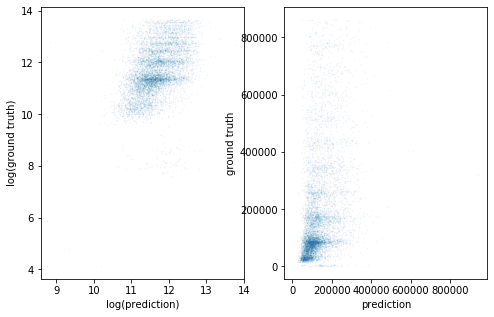

In [112]:
ypred = model.predict(dvalid)
fig,ax = plt.subplots(ncols=2)
ax[0].scatter(ypred, yv, s=0.1, alpha=0.1)
ax[0].set_xlabel('log(prediction)')
ax[0].set_ylabel('log(ground truth)')
ax[1].scatter(np.exp(ypred), np.exp(yv), s=0.1, alpha=0.1)
ax[1].set_xlabel('prediction')
ax[1].set_ylabel('ground truth')
plt.show()

In [118]:
ytest = model.predict(dtest)
print('Test shape OK.') if test.shape[0] == ytest.shape[0] else print('Oops')
test['duration'] = np.exp(ytest) - 1

Test shape OK.


ipykernel_launcher:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Valid prediction mean: 10.332
Test prediction mean: 10.375


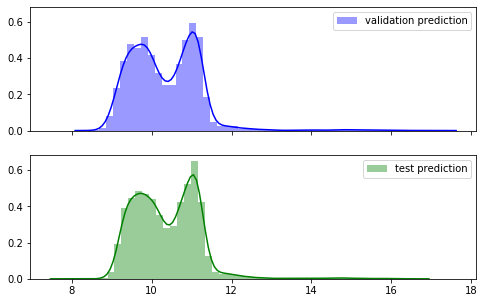

Total time: 43579 seconds


In [71]:
print('Valid prediction mean: %.3f' % ypred.mean())
print('Test prediction mean: %.3f' % ytest.mean())

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
sns.distplot(ypred, ax=ax[0], color='blue', label='validation prediction')
sns.distplot(ytest, ax=ax[1], color='green', label='test prediction')
ax[0].legend(loc=0)
ax[1].legend(loc=0)
plt.show()

t1 = dt.datetime.now()
print('Total time: %i seconds' % (t1 - t0).seconds)

Valid prediction mean: 11.654
Test prediction mean: 11.714


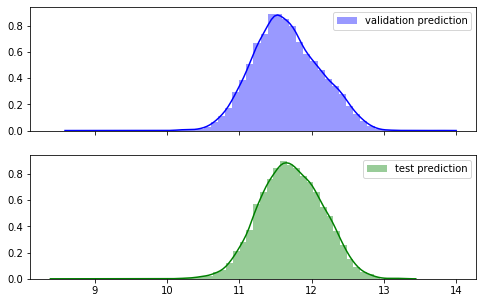

Total time: 57420 seconds


In [119]:
print('Valid prediction mean: %.3f' % ypred.mean())
print('Test prediction mean: %.3f' % ytest.mean())

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
sns.distplot(ypred, ax=ax[0], color='blue', label='validation prediction')
sns.distplot(ytest, ax=ax[1], color='green', label='test prediction')
ax[0].legend(loc=0)
ax[1].legend(loc=0)
plt.show()

t1 = dt.datetime.now()
print('Total time: %i seconds' % (t1 - t0).seconds)

In [72]:
feature_importance_dict = model.get_fscore()
fs = ['f%i' % i for i in range(len(feature_names))]
f1 = pd.DataFrame({'f': list(feature_importance_dict.keys()),
                   'importance': list(feature_importance_dict.values())})
f2 = pd.DataFrame({'f': fs, 'feature_name': feature_names})
feature_importance = pd.merge(f1, f2, how='right', on='f')
feature_importance = feature_importance.fillna(0)

feature_importance[['feature_name', 'importance']].sort_values(by='importance', ascending=False)

,feature_name,importance
16,pickup_week_hour,22025.0
13,pickup_hour,20634.0
19,dropoff_hour,20577.0
22,dropoff_week_hour,20380.0
23,travel_no,20297.0
15,pickup_dt,19627.0
2,end_lat,17952.0
4,dest_pca1,15922.0
21,dropoff_dt,15595.0
1,end_lng,15260.0


In [57]:
# Use the best results from above: 0.34423
xgb_pars={'min_child_weight': 8, 'eta': 0.02, 'colsample_bytree': 0.5, 'max_depth': 10,
             'subsample': 0.8, 'lambda': 0.5, 'nthread': 4, 'booster' : 'gbtree', 'silent': 1,
             'eval_metric': 'rmse', 'objective': 'reg:squarederror'}


model = xgb.train(xgb_pars, dtrain, 2000, watchlist, early_stopping_rounds=50,
                  maximize=False, verbose_eval=100)

[22:38:11] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-rmse:9.69784	valid-rmse:9.68285


/Users/wangwenqing/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:528: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  format(", ".join(args_msg)), FutureWarning


[100]	train-rmse:1.31089	valid-rmse:1.30687
[200]	train-rmse:0.19996	valid-rmse:0.20898
[300]	train-rmse:0.05485	valid-rmse:0.08264
[400]	train-rmse:0.03254	valid-rmse:0.06738
[500]	train-rmse:0.02532	valid-rmse:0.06287
[600]	train-rmse:0.02190	valid-rmse:0.06116
[700]	train-rmse:0.01964	valid-rmse:0.06014
[800]	train-rmse:0.01794	valid-rmse:0.05945
[900]	train-rmse:0.01665	valid-rmse:0.05903
[1000]	train-rmse:0.01559	valid-rmse:0.05874
[1100]	train-rmse:0.01474	valid-rmse:0.05854
[1200]	train-rmse:0.01396	valid-rmse:0.05839
[1300]	train-rmse:0.01321	valid-rmse:0.05819
[1400]	train-rmse:0.01256	valid-rmse:0.05803
[1500]	train-rmse:0.01191	valid-rmse:0.05790
[1600]	train-rmse:0.01130	valid-rmse:0.05780
[1700]	train-rmse:0.01072	valid-rmse:0.05767
[1800]	train-rmse:0.01015	valid-rmse:0.05757
[1900]	train-rmse:0.00956	valid-rmse:0.05748
[1999]	train-rmse:0.00906	valid-rmse:0.05738


In [58]:
print('Modeling RMSLE %.5f' % model.best_score)

Modeling RMSLE 0.05738


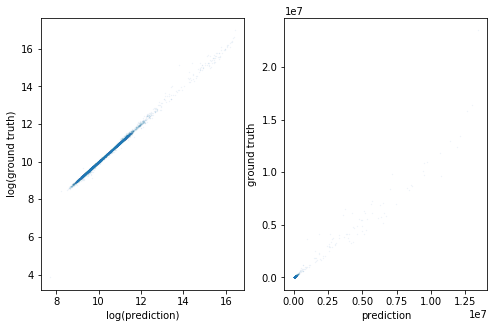

In [59]:
ypred = model.predict(dvalid)
fig,ax = plt.subplots(ncols=2)
ax[0].scatter(ypred, yv, s=0.1, alpha=0.1)
ax[0].set_xlabel('log(prediction)')
ax[0].set_ylabel('log(ground truth)')
ax[1].scatter(np.exp(ypred), np.exp(yv), s=0.1, alpha=0.1)
ax[1].set_xlabel('prediction')
ax[1].set_ylabel('ground truth')
plt.show()

In [60]:
from sklearn.metrics import mean_squared_error
score = np.sqrt(mean_squared_error(np.exp(ypred), np.exp(yv)))
print(score)
print(len(ypred))

140690.58238575808
10053


In [61]:
ytest = model.predict(dtest)
print('Test shape OK.') if test.shape[0] == ytest.shape[0] else print('Oops')
test['duration'] = np.exp(ytest) - 1

Test shape OK.


ipykernel_launcher:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Valid prediction mean: 10.336
Test prediction mean: 10.350


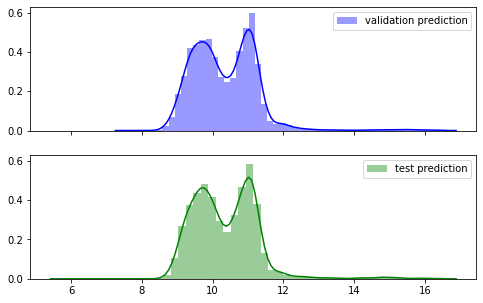

Total time: 1126 seconds


In [62]:

print('Valid prediction mean: %.3f' % ypred.mean())
print('Test prediction mean: %.3f' % ytest.mean())

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
sns.distplot(ypred, ax=ax[0], color='blue', label='validation prediction')
sns.distplot(ytest, ax=ax[1], color='green', label='test prediction')
ax[0].legend(loc=0)
ax[1].legend(loc=0)
plt.show()

t1 = dt.datetime.now()
print('Total time: %i seconds' % (t1 - t0).seconds)

In [63]:
feature_importance_dict = model.get_fscore()
fs = ['f%i' % i for i in range(len(feature_names))]
f1 = pd.DataFrame({'f': list(feature_importance_dict.keys()),
                   'importance': list(feature_importance_dict.values())})
f2 = pd.DataFrame({'f': fs, 'feature_name': feature_names})
feature_importance = pd.merge(f1, f2, how='right', on='f')
feature_importance = feature_importance.fillna(0)

feature_importance[['feature_name', 'importance']].sort_values(by='importance', ascending=False)

,feature_name,importance
3,total_seconds,25806.0
14,pickup_hour,14248.0
20,dropoff_hour,13959.0
24,travel_no,12370.0
17,pickup_week_hour,12035.0
2,end_lat,11711.0
16,pickup_dt,11362.0
1,end_lng,10956.0
4,dest_pca0,10683.0
9,pca_manhattan,10533.0


Track data preprocessing 

In [113]:
track_data=pd.read_csv("zjxl_truck_loaction_month_11.csv")
track_11_qd=track_data[track_data.truck_no.isin(query_11_qd['truck_no'])]

NameError: name 'query_11_qd' is not defined

In [117]:
import transbigdata as tbd
tbd.data_summary(track_data,col = ['truck_no','utc'],show_sample_duration=True)

Amount of data
-----------------
Total number of data items:  1048575
Total number of individuals:  2013
Data volume of individuals(Mean):  520.9016
Data volume of individuals(Upper quartile):  829.0
Data volume of individuals(Median):  344.0
Data volume of individuals(Lower quartile):  41.0

Data time period
-----------------
Start time:  2021/11/10 0:00
End time:  2021/11/9 9:59

Sampling interval
-----------------
Mean:  1848.634 s
Upper quartile:  300.0 s
Median:  300.0 s
Lower quartile:  0.0 s


In [21]:
track_11_qd['utc']=pd.to_datetime(track_11_qd['utc'],format="%Y/%m/%d %H:%M")
track_11_qd=track_11_qd.sort_values(by=['truck_no','utc'],ascending=[True,True])

track_11_qd.head()

ipykernel_launcher:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,rowid,truck_no,utc,lat,lon,spd,drc,address,province,city,country,query_time,insert_time
648366,1.394520e+18,琼E10248,2021-11-08 20:36:00,36.095457,120.080600,0.0,0,"山东省青岛市黄岛区红柳河路899西北方向180米青岛端佑钢铁有限公司西门,北方向,98.7米",山东省,青岛市,黄岛区,2021/11/8 20:41,41:04.0
648367,1.394590e+18,琼E10248,2021-11-09 01:17:00,36.095457,120.080600,0.0,0,"山东省青岛市黄岛区红柳河路899西北方向180米青岛端佑钢铁有限公司西门,北方向,98.7米",山东省,青岛市,黄岛区,2021/11/9 1:21,21:04.0
648239,1.394630e+18,琼E10248,2021-11-09 04:10:00,36.095390,120.080620,0.0,0,"山东省青岛市黄岛区红柳河路899西北方向180米青岛端佑钢铁有限公司西门,北方向,91.2米",山东省,青岛市,黄岛区,2021/11/9 4:11,11:04.0
648240,1.394730e+18,琼E10248,2021-11-09 10:20:00,36.095330,120.080585,0.0,0,"山东省青岛市黄岛区红柳河路899西北方向180米青岛端佑钢铁有限公司西门,北方向,84.9米",山东省,青岛市,黄岛区,2021/11/9 10:26,26:05.0
648241,1.394850e+18,琼E10248,2021-11-09 18:43:00,35.158562,119.371122,0.0,237,"山东省日照市岚山区日照钢铁理化中心,东南方向,312.9米",山东省,日照市,岚山区,2021/11/9 18:46,46:07.0


In [22]:
track_qd=track_11_qd[track_11_qd['province']=='山东省']


In [23]:
import transbigdata as tbd
track_qd=tbd.clean_same(track_qd, col=['truck_no', 'utc', 'lon', 'lat'])
track_qd.to_csv("qd_traj.csv")


In [24]:
query_11_qd['load_date']=pd.to_datetime(query_11_qd['load_date'],format="%Y/%m/%d %H:%M")
query_11_qd.head()

ipykernel_launcher:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,truck_no,load_date,end_point
52,鲁LE7632,2021-11-01 01:52:00,P000051729
54,鲁L17303,2021-11-01 01:54:20,P000051729
60,鲁L61106,2021-11-01 02:00:54,P000051729
108,苏GM2079,2021-11-01 04:18:00,P000018362
111,鲁L79123,2021-11-01 04:27:12,P000051729


In [49]:
total=[]
traj=[]
flag=True
for i in track_qd.itertuples(): 
    for k in query_11_qd.itertuples():
        point=[]
#         print(getattr(i,'truck_no'))      
        if (getattr(i,'truck_no')==getattr(k,'truck_no')) & (getattr(i,'utc')>getattr(k,'load_date')):
            # print("track start:",i)
            point.append(i)
            traj.append(point)
            # print(traj)     
            break
        if len(traj)!=0:
            # print("list last object",type(traj[-1]))
            if(getattr(traj[-1][0],'city')=='青岛市') & (getattr(i,'city')=='日照市'):
                total.append(traj)
                traj=[]
        
           
   



In [52]:
from pandas.core.frame import DataFrame
def print_list(lst,lis=[]):
    for x in lst:
        if (type(x))
data=DataFrame(total)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,"[(648366, 1.39452e+18, 琼E10248, 2021-11-08 20:...","[(648367, 1.39459e+18, 琼E10248, 2021-11-09 01:...","[(648239, 1.39463e+18, 琼E10248, 2021-11-09 04:...","[(648240, 1.39473e+18, 琼E10248, 2021-11-09 10:...",None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,"[(648241, 1.39485e+18, 琼E10248, 2021-11-09 18:...","[(648215, 1.39557e+18, 琼E10248, 2021-11-11 18:...","[(648208, 1.39577e+18, 琼E10248, 2021-11-12 07:...","[(648209, 1.3958e+18, 琼E10248, 2021-11-12 09:2...","[(648210, 1.3958e+18, 琼E10248, 2021-11-12 09:3...","[(648211, 1.39583e+18, 琼E10248, 2021-11-12 11:...",None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,"[(648207, 1.39619e+18, 琼E10248, 2021-11-13 11:...","[(648201, 1.39646e+18, 琼E10248, 2021-11-14 05:...","[(648202, 1.39647e+18, 琼E10248, 2021-11-14 05:...","[(648349, 1.39648e+18, 琼E10248, 2021-11-14 06:...","[(648203, 1.39664e+18, 琼E10248, 2021-11-14 16:...","[(648204, 1.39666e+18, 琼E10248, 2021-11-14 18:...","[(648205, 1.39666e+18, 琼E10248, 2021-11-14 18:...","[(648345, 1.39702e+18, 琼E10248, 2021-11-15 18:...","[(648346, 1.39705e+18, 琼E10248, 2021-11-15 20:...","[(648199, 1.39708e+18, 琼E10248, 2021-11-15 22:...",...,None,None,None,None,None,None,None,None,None,None
3,"[(647544, 1.4021e+18, 琼E10248, 2021-11-29 18:4...","[(648097, 1.4021e+18, 琼E10248, 2021-11-29 18:4...","[(647285, 1.4021e+18, 琼E10248, 2021-11-29 18:5...","[(647896, 1.4021e+18, 琼E10248, 2021-11-29 18:5...","[(647312, 1.40211e+18, 琼E10248, 2021-11-29 19:...","[(648107, 1.40211e+18, 琼E10248, 2021-11-29 19:...","[(647923, 1.40211e+18, 琼E10248, 2021-11-29 19:...","[(647668, 1.40211e+18, 琼E10248, 2021-11-29 19:...","[(647442, 1.40211e+18, 琼E10248, 2021-11-29 19:...","[(647591, 1.40211e+18, 琼E10248, 2021-11-29 19:...",...,None,None,None,None,None,None,None,None,None,None
4,"[(647244, 1.40237e+18, 琼E10248, 2021-11-30 12:...","[(647496, 1.40237e+18, 琼E10248, 2021-11-30 12:...","[(647566, 1.40238e+18, 琼E10248, 2021-11-30 12:...","[(647255, 1.40238e+18, 琼E10248, 2021-11-30 12:...","[(647609, 1.40238e+18, 琼E10248, 2021-11-30 13:...","[(647456, 1.40238e+18, 琼E10248, 2021-11-30 13:...","[(647567, 1.40238e+18, 琼E10248, 2021-11-30 13:...","[(647256, 1.40238e+18, 琼E10248, 2021-11-30 13:...","[(647568, 1.40239e+18, 琼E10248, 2021-11-30 13:...","[(647955, 1.40239e+18, 琼E10248, 2021-11-30 13:...",...,None,None,None,None,None,None,None,None,None,None


In [61]:
from pandas.core.frame import DataFrame
def one_list(lst,result=[]):
    for x in lst:
        if type(x) is list:
            one_list(x)
        else:
            result.append(x)
    return result
data=DataFrame(one_list(total))
data.head()

,Index,rowid,truck_no,utc,lat,lon,spd,drc,address,province,city,country,query_time,insert_time
0,648366,1.394520e+18,琼E10248,2021-11-08 20:36:00,36.095457,120.080600,0.0,0,"山东省青岛市黄岛区红柳河路899西北方向180米青岛端佑钢铁有限公司西门,北方向,98.7米",山东省,青岛市,黄岛区,2021/11/8 20:41,41:04.0
1,648367,1.394590e+18,琼E10248,2021-11-09 01:17:00,36.095457,120.080600,0.0,0,"山东省青岛市黄岛区红柳河路899西北方向180米青岛端佑钢铁有限公司西门,北方向,98.7米",山东省,青岛市,黄岛区,2021/11/9 1:21,21:04.0
2,648239,1.394630e+18,琼E10248,2021-11-09 04:10:00,36.095390,120.080620,0.0,0,"山东省青岛市黄岛区红柳河路899西北方向180米青岛端佑钢铁有限公司西门,北方向,91.2米",山东省,青岛市,黄岛区,2021/11/9 4:11,11:04.0
3,648240,1.394730e+18,琼E10248,2021-11-09 10:20:00,36.095330,120.080585,0.0,0,"山东省青岛市黄岛区红柳河路899西北方向180米青岛端佑钢铁有限公司西门,北方向,84.9米",山东省,青岛市,黄岛区,2021/11/9 10:26,26:05.0
4,648241,1.394850e+18,琼E10248,2021-11-09 18:43:00,35.158562,119.371122,0.0,237,"山东省日照市岚山区日照钢铁理化中心,东南方向,312.9米",山东省,日照市,岚山区,2021/11/9 18:46,46:07.0


In [62]:
data.to_csv("track_data_total.csv")

提取轨迹和相应特征 存入json

In [116]:
data=pd.read_csv("track_data_total.csv")

In [118]:
data.head(1)

,Unnamed: 0,Index,rowid,truck_no,utc,lat,lon,spd,drc,address,province,city,country,query_time,insert_time
0,0,648366,1.394520e+18,琼E10248,2021-11-08 20:36:00,36.095457,120.0806,0.0,0,"山东省青岛市黄岛区红柳河路899西北方向180米青岛端佑钢铁有限公司西门,北方向,98.7米",山东省,青岛市,黄岛区,2021/11/8 20:41,41:04.0


In [120]:
data=data.sort_values(by=['truck_no','utc'],ascending=[False,True])

In [121]:
data.head()

,Unnamed: 0,Index,rowid,truck_no,utc,lat,lon,spd,drc,address,province,city,country,query_time,insert_time
188789,188789,644467,1.400530e+18,鲁VQ6361,2021-11-25 10:30:00,35.150663,119.320200,0.0,134,"山东省日照市岚山区日照利尔高温新材料有限公司,东南方向,227.9米",山东省,日照市,岚山区,2021/11/25 10:31,31:08.0
188790,188790,644588,1.400530e+18,鲁VQ6361,2021-11-25 10:34:00,35.151147,119.319312,0.0,274,"山东省日照市岚山区日照利尔高温新材料有限公司,南方向,164.5米",山东省,日照市,岚山区,2021/11/25 10:36,36:10.0
188791,188791,644521,1.400530e+18,鲁VQ6361,2021-11-25 10:44:00,35.151147,119.319312,0.0,168,"山东省日照市岚山区日照利尔高温新材料有限公司,南方向,164.5米",山东省,日照市,岚山区,2021/11/25 10:46,46:09.0
188792,188792,644325,1.400530e+18,鲁VQ6361,2021-11-25 10:50:00,35.152452,119.321600,20.0,91,"山东省日照市岚山区日照宝岚新材料科技有限公司,西方向,164.3米",山东省,日照市,岚山区,2021/11/25 10:51,51:09.0
188793,188793,644299,1.400530e+18,鲁VQ6361,2021-11-25 10:55:00,35.157080,119.321055,37.0,269,"山东省日照市岚山区松树园村,东北方向,261.5米",山东省,日照市,岚山区,2021/11/25 10:56,56:08.0


In [123]:
listType= data['truck_no'].unique()
print(len(listType))

458


In [141]:
total=[]
traj=[]
flag=True
for i in data0.itertuples(): 
    # print(i)   
    if len(traj)!=0:
        # print("traj",traj)
        # print("last traj",traj[-1])
            # print("list last object",type(traj[-1]))
        if(getattr(traj[-1],'city')=='青岛市') & (getattr(i,'city')=='日照市'):
            print("1111")
            total.append(traj)
            traj=[]
    traj.append(i)

1111
1111
1111


In [146]:
total=[]
traj=[]
flag=True
count=0
for j in range(len(listType)): 
    for i in data[data['truck_no'].isin([listType[j]])].itertuples():
    # print(i)   
        if len(traj)!=0:
        # print("traj",traj)
        # print("last traj",traj[-1])
            # print("list last object",type(traj[-1]))
            if(getattr(traj[-1],'city')=='青岛市') & (getattr(i,'city')=='日照市'):
                count+=1
                total.append(traj)
                traj=[]
        traj.append(i)
print("traj count",count)

traj count 3103


In [147]:
print(total[0][0])

Pandas(Index=188789, _1=188789, _2=644467, rowid=1.40053e+18, truck_no='鲁VQ6361', utc='2021-11-25 10:30:00', lat=35.150663, lon=119.3202, spd=0.0, drc=134, address='山东省日照市岚山区日照利尔高温新材料有限公司,东南方向,227.9米', province='山东省', city='日照市', country='岚山区', query_time='2021/11/25 10:31', insert_time='31:08.0')


In [ ]:
import json
from datetime import datetime
for i in total:
    traj=[]
    start_time=getattr(i,'utc')
    day = datetime.strptime(start_time, '%Y-%m-%d %H:%M:%S').strftime('%d')
    hour=datetime.strptime(start_time, '%Y-%m-%d %H:%M:%S').strftime('%H')
    minutes=datetime.strptime(start_time, '%Y-%m-%d %H:%M:%S').strftime('%M')
    timeID=hour*60+minutes
    time_gap=[]
    dist_gap=[]
    lat=[]
    lon=[]
    totaltime=0
    for j in i:
        lat.append(getattr(j,'lat'))
        lon.append(getattr(j,'lat'))
    
    traj.append({"driverID":getattr(i,'truck_no'),"dateID":day, "weekID": ,"timeID": timeID,
    "dist": ,"time": ,"lngs": lon,"lats": lat,"time_gap": ,"dist_gap":})
    
    with open('traj.json','w') as traj_dumped:
        json.dump(traj,traj_dumped)


In [125]:
 data0 =  data[data['truck_no'].isin([listType[0]])]
 print(data0)

        Unnamed: 0   Index         rowid truck_no                  utc  \
188789      188789  644467  1.400530e+18  鲁VQ6361  2021-11-25 10:30:00   
188790      188790  644588  1.400530e+18  鲁VQ6361  2021-11-25 10:34:00   
188791      188791  644521  1.400530e+18  鲁VQ6361  2021-11-25 10:44:00   
188792      188792  644325  1.400530e+18  鲁VQ6361  2021-11-25 10:50:00   
188793      188793  644299  1.400530e+18  鲁VQ6361  2021-11-25 10:55:00   
...            ...     ...           ...      ...                  ...   
189050      189050  644528  1.401710e+18  鲁VQ6361  2021-11-28 16:45:00   
189051      189051  644450  1.401710e+18  鲁VQ6361  2021-11-28 16:50:00   
189052      189052  644516  1.401710e+18  鲁VQ6361  2021-11-28 16:55:00   
189053      189053  644407  1.401710e+18  鲁VQ6361  2021-11-28 17:00:00   
189054      189054  644531  1.401710e+18  鲁VQ6361  2021-11-28 17:05:00   

              lat         lon   spd  drc  \
188789  35.150663  119.320200   0.0  134   
188790  35.151147  119.

In [59]:
data=data[data['city']!='临沂市']
data.to_csv("qd_trajectory.csv")

In [60]:
import transbigdata as tbd
tbd.visualization_data(data, col=['lon', 'lat'], accuracy=500)

/Users/wangwenqing/opt/anaconda3/lib/python3.7/site-packages/transbigdata/visualizion.py:345: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LONCOL'],data['LATCOL']= GPS_to_grids(data[lon],data[lat],params)
/Users/wangwenqing/opt/anaconda3/lib/python3.7/site-packages/transbigdata/visualizion.py:346: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[count] = 1


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'ytak0zp', 'type': …

In [21]:
import transbigdata as tbd
tbd.visualization_data(track_qd, col=['lon', 'lat'], accuracy=500)

/Users/wangwenqing/opt/anaconda3/lib/python3.7/site-packages/transbigdata/visualizion.py:345: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LONCOL'],data['LATCOL']= GPS_to_grids(data[lon],data[lat],params)
/Users/wangwenqing/opt/anaconda3/lib/python3.7/site-packages/transbigdata/visualizion.py:346: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[count] = 1


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'ytak0zp', 'type': …

In [24]:
data.describe()

,waybill_no,status,truck_no,trans_type,start_point,end_point,load_date,return_date
count,42786,42786,42786,42786,40992,40969,42786,26005
unique,42786,3,3977,1,1,1101,40121,25813
top,YD211101001363,YDZT30,鲁L77790,YSLX10,P000000984,P000047309,2021-11-25 00:27:20,2021-11-26 14:23:21
freq,1,26521,149,42786,40992,5472,12,3


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42786 entries, 0 to 42785
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   waybill_no   42786 non-null  object
 1   status       42786 non-null  object
 2   truck_no     42786 non-null  object
 3   trans_type   42786 non-null  object
 4   start_point  40992 non-null  object
 5   end_point    40969 non-null  object
 6   load_date    42786 non-null  object
 7   return_date  26005 non-null  object
dtypes: object(8)
memory usage: 2.9+ MB


In [24]:
track_data=pd.read_csv("zjxl_truck_loaction_month_11.csv")
track_data.head()

,rowid,truck_no,utc,lat,lon,spd,drc,address,province,city,country,query_time,insert_time
0,1.402320e+18,沪DT1770,2021/11/30 8:51,32.753797,119.891840,0.0,0,"江苏省泰州市兴化市迎宾路8号西南方向70米海宇电声器材公司,西北方向,88.1米",江苏省,泰州市,兴化市,2021/11/30 9:16,16:07.0
1,1.402510e+18,沪DT1770,2021/11/30 21:51,35.137360,119.263562,3.3,0,"山东省日照市岚山区岚山收费站,西方向,122.2米",山东省,日照市,岚山区,2021/11/30 21:51,51:07.0
2,1.401910e+18,沪DT1770,2021/11/29 6:20,34.596730,119.415662,67.1,345,"江苏省连云港市连云区前庄,南方向,885.6米",江苏省,连云港市,连云区,2021/11/29 6:21,21:09.0
3,1.401990e+18,沪DT1770,2021/11/29 11:16,35.003962,119.192400,0.0,0,"江苏省连云港市赣榆区石桥镇韩口大市场西北方向130米易捷便利店(赣榆金海湾加油站),东北方向...",江苏省,连云港市,赣榆区,2021/11/29 11:36,36:09.0
4,1.402160e+18,沪DT1770,2021/11/29 22:20,33.454127,119.847130,0.0,0,"江苏省盐城市建湖县S231建湖服务区,东方向,42.0米",江苏省,盐城市,建湖县,2021/11/29 22:21,21:04.0


In [16]:
import transbigdata as tbd
tbd.visualization_data(track_data, col=['lon', 'lat'], accuracy=500, zoom='auto')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'ytak0zp', 'type': …

In [29]:
data.isnull().sum()

waybill_no         0
status             0
truck_no           0
trans_type         0
start_point     1794
end_point       1817
load_date          0
return_date    16781
dtype: int64

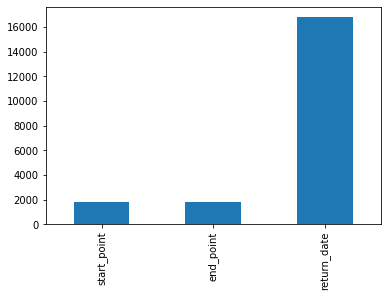

In [30]:
# nan可视化
missing = data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

## 某一时段可用运力

In [19]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
order_data=pd.read_csv("trans_waybill_11.csv")
order_data.head()

,waybill_no,status,truck_no,trans_type,start_point,end_point,load_date,return_date
0,YD211101001363,YDZT30,苏GX1875,YSLX10,P000000984,P000029911,2021-11-01 00:00:32,2021-11-01 07:03:44
1,YD211101001364,YDZT30,鲁VX8057,YSLX10,P000000984,P000042713,2021-11-01 00:00:39,2021-11-12 07:53:09
2,YD211101001366,YDZT10,鲁L96177,YSLX10,P000000984,P000066007,2021-11-01 00:02:31,NaN
3,YD211101001367,YDZT10,鲁H34K97,YSLX10,P000000984,P000058452,2021-11-01 00:03:02,NaN
4,YD211101001368,YDZT10,鲁Q808FD,YSLX10,P000000984,P000057790,2021-11-01 00:04:31,NaN


In [20]:
data=order_data.sort_values(by="load_date",ascending=True)
data

,waybill_no,status,truck_no,trans_type,start_point,end_point,load_date,return_date
0,YD211101001363,YDZT30,苏GX1875,YSLX10,P000000984,P000029911,2021-11-01 00:00:32,2021-11-01 07:03:44
1,YD211101001364,YDZT30,鲁VX8057,YSLX10,P000000984,P000042713,2021-11-01 00:00:39,2021-11-12 07:53:09
2,YD211101001366,YDZT10,鲁L96177,YSLX10,P000000984,P000066007,2021-11-01 00:02:31,NaN
3,YD211101001367,YDZT10,鲁H34K97,YSLX10,P000000984,P000058452,2021-11-01 00:03:02,NaN
4,YD211101001368,YDZT10,鲁Q808FD,YSLX10,P000000984,P000057790,2021-11-01 00:04:31,NaN
...,...,...,...,...,...,...,...,...
42781,YD211130005067,YDZT30,苏GH8652,YSLX10,P000000984,P000018204,2021-11-30 23:42:21,2021-12-01 00:06:05
42782,YD211130005073,YDZT30,苏GJ5951,YSLX10,P000000984,P000018204,2021-11-30 23:49:42,2021-12-01 00:18:41
42783,YD211130005074,YDZT30,苏GS5383,YSLX10,P000000984,P000054973,2021-11-30 23:50:00,2021-12-01 09:18:43
42784,YD211130005075,YDZT30,鲁L68050,YSLX10,NaN,P000042713,2021-11-30 23:51:46,NaN


In [22]:
data['load_date']=pd.to_datetime(data['load_date'])
data.dtypes

waybill_no             object
status                 object
truck_no               object
trans_type             object
start_point            object
end_point              object
load_date      datetime64[ns]
return_date            object
dtype: object

In [361]:
cargo['hour']=pd.to_datetime(cargo['load_date']).dt.hour
cargo.head()

,Unnamed: 0,rowid,company_id,plan_no,plan_company_id,trains_no,waybill_no,status,order_no,pick_no,...,end_time,ods_update_time,start_lng,start_lat,duration,total_seconds,log_duration,date,end_date,hour
0,77,1293438,C000000882,DD210208001112,C000065362,C210208001248,YD210208001866,YDZT12,TCDH2101210116,CDH2101210116,...,2021/2/9 16:38,2021/8/31 14:41,119.337247,35.157347,0 days 18:21:37,66097,11.098894,2021/2/8,2021/2/9,22
1,186,2438488,C000000882,DD220207000081,C000034775,C220207000014,YD220207002118,YDZT30,TCDH2201260038,CDH2201260038,...,2022/2/7 10:54,2022/2/7 10:54,119.337247,35.157347,0 days 08:30:24,30624,10.329572,2022/2/7,2022/2/7,2
2,320,1285109,C000000882,DD210205000223,C000065362,C210205000283,YD210205001275,YDZT12,TCDH2101210063,CDH2101210063,...,2021/2/6 11:27,2021/8/31 14:41,119.337247,35.157347,0 days 21:44:18,78258,11.267779,2021/2/5,2021/2/6,13
3,344,2432068,C000000882,DD220204001760,C000005863,C220204000394,YD220204003228,YDZT30,TCDH2201200053,CDH2201200053,...,2022/2/5 8:48,2022/2/5 8:48,119.337247,35.157347,0 days 18:34:16,66856,11.110311,2022/2/4,2022/2/5,14
4,364,2433676,C000000882,DD220205000746,C000005265,C220205000174,YD220205002485,YDZT30,TCDH2201210025,CDH2201210025,...,2022/2/5 14:13,2022/2/5 14:13,119.337247,35.157347,0 days 07:25:38,26738,10.193878,2022/2/5,2022/2/5,6


In [365]:
print(cargo.columns)

Index(['Unnamed: 0', 'rowid', 'company_id', 'plan_no', 'plan_company_id',
       'trains_no', 'waybill_no', 'status', 'order_no', 'pick_no',
       'source_type', 'travel_no', 'consignor_company_id', 'settle_company_id',
       'carrier_company_id', 'driver_id', 'consignee_company_id', 'trans_type',
       'start_point', 'end_point', 'load_date', 'arrive_date', 'return_date',
       'bat_flag', 'product_name', 'pre_total_weight', 'pre_total_sheet',
       'total_weight', 'total_sheet', 'business_type', 'is_settle',
       'settle_flag', 'price_flag', 'price_type', 'receive_type',
       'rcv_trans_fee', 'return_bill_date', 'return_bill_lng',
       'return_bill_lat', 'return_bill_address', 'return_scan_flag',
       'return_bill_range', 'return_bill_range_flag',
       'return_bill_exception_pic', 'signing_method', 'main_product_list_no',
       'outstock_bill_no', 'group_driver_name', 'weight', 'create_date',
       'update_date', 'is_bicycle_settle', 'stand_kilo', 'settle_kilo',
    

In [364]:
groups=cargo.groupby(['date','hour']).sum()
print(groups['pre_total_sheet'])

date       hour
2020/10/1  2        1
           4        2
           7        5
           9        1
           10       2
                   ..
2022/2/9   10      38
           11       5
           12       3
           13       1
           17       3
Name: pre_total_sheet, Length: 13771, dtype: int64


In [371]:
cargo['time']=cargo['date'].map(str)+'-'+cargo['hour'].map(str)
cargo=cargo[['time','pre_total_sheet']]

In [373]:
cargo.head()

,time,pre_total_sheet
0,2021/2/8-22,1
1,2022/2/7-2,2
2,2021/2/5-13,1
3,2022/2/4-14,2
4,2022/2/5-6,1


In [367]:
groups['pre_total_sheet'].to_csv("cargo.csv")

In [376]:
cargo=pd.read_csv("cargo.csv")

In [378]:
cargo=cargo.sort_values(by=['date','hour'],ascending=[True,True])
cargo.head()

,date,hour,pre_total_sheet
0,2020/10/1,2,1
1,2020/10/1,4,2
2,2020/10/1,7,5
3,2020/10/1,9,1
4,2020/10/1,10,2


In [379]:
cargo['time']=cargo['date'].map(str)+'-'+cargo['hour'].map(str)
cargo=cargo[['time','pre_total_sheet']]

In [ ]:
cargo.to_csv("total_cargo.csv")

In [24]:
data['day']=data['load_date'].dt.day
data['hour']=data['load_date'].dt.hour
data.head()

,waybill_no,status,truck_no,trans_type,start_point,end_point,load_date,return_date,day,hour
0,YD211101001363,YDZT30,苏GX1875,YSLX10,P000000984,P000029911,2021-11-01 00:00:32,2021-11-01 07:03:44,1,0
1,YD211101001364,YDZT30,鲁VX8057,YSLX10,P000000984,P000042713,2021-11-01 00:00:39,2021-11-12 07:53:09,1,0
2,YD211101001366,YDZT10,鲁L96177,YSLX10,P000000984,P000066007,2021-11-01 00:02:31,NaN,1,0
3,YD211101001367,YDZT10,鲁H34K97,YSLX10,P000000984,P000058452,2021-11-01 00:03:02,NaN,1,0
4,YD211101001368,YDZT10,鲁Q808FD,YSLX10,P000000984,P000057790,2021-11-01 00:04:31,NaN,1,0


In [25]:
groups=data.groupby(['day','hour']).count()
print(groups)

          waybill_no  status  truck_no  trans_type  start_point  end_point  \
day hour                                                                     
1   0             30      30        30          30           30         21   
    1             29      29        29          29           29         29   
    2             27      27        27          27           27         27   
    3             18      18        18          18           18         18   
    4             25      25        25          25           25         25   
...              ...     ...       ...         ...          ...        ...   
30  19            78      78        78          78           66         76   
    20            62      62        62          62           58         62   
    21            64      64        64          64           57         63   
    22            49      49        49          49           43         48   
    23            28      28        28          28           26 

/Users/wangwenqing/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='line')` instead of `Series.plot('line',)`.
  """Entry point for launching an IPython kernel.


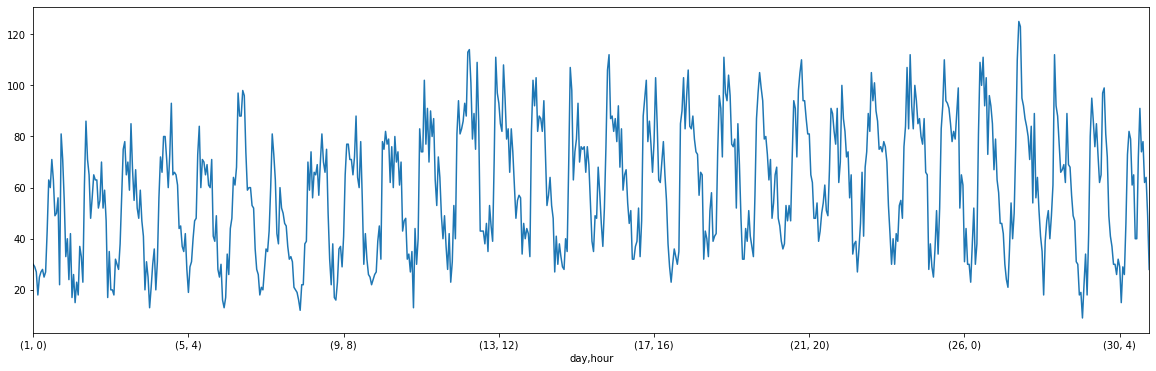

In [33]:
groups['waybill_no'].plot('line')
plt.rcParams["figure.figsize"] = (20,6)
plt.show()

In [31]:
num_by_hour=groups
num_by_hour.to_csv("num_by_hour.csv")

In [4]:
num=pd.read_csv("num_by_hour.csv")
num.head()

,day,hour,num
0,1,0,30
1,1,1,29
2,1,2,27
3,1,3,18
4,1,4,25


## 时间序列预测

In [5]:
num['time']=num['day'].map(str)+'-'+num['hour'].map(str)
num=num[['time','num']]

In [7]:
num.head()

,time,num
0,1-0,30
1,1-1,29
2,1-2,27
3,1-3,18
4,1-4,25


/Users/wangwenqing/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


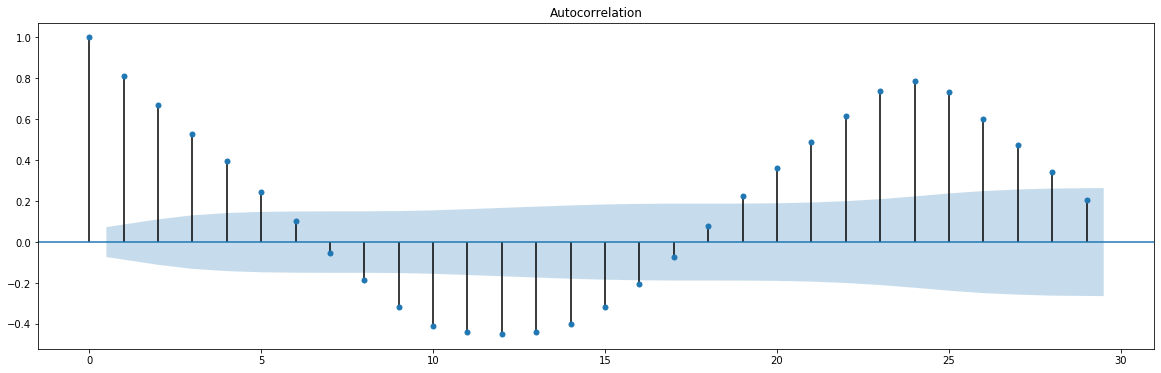

In [75]:
import seaborn as sns     #seaborn画出的图更好看，且代码更简单，缺点是可塑性差
from statsmodels.graphics.tsaplots import plot_acf  #自相关图
from statsmodels.tsa.stattools import adfuller as ADF  #平稳性检测
from statsmodels.graphics.tsaplots import plot_pacf    #偏自相关图
from statsmodels.stats.diagnostic import acorr_ljungbox    #白噪声检验
from statsmodels.tsa.arima_model import ARIMA
#自相关图
plot_acf(num['num']).show()

In [76]:
#平稳性检测
print(u'原始序列的ADF检验结果为：', ADF(num['num']))
#返回值依次为adf、pvalue、usedlag、nobs、critical values、icbest、regresults、resstore

原始序列的ADF检验结果为： (-3.1510668210920283, 0.022997668389416043, 20, 699, {'1%': -3.439739809554328, '5%': -2.86568368980381, '10%': -2.5689766074363334}, 5585.774505328249)


In [90]:
print(u'原始序列的白噪声检验结果为：', acorr_ljungbox(num['num'], lags=1)) #返回统计量和p值

原始序列的白噪声检验结果为： (array([474.17336462]), array([3.95933734e-105]))


输出p值远小于0.05，所以原始序列是平稳非白噪声序列

### ARIMA模型定阶
#### 差分阶数d
时间序列本身就是平稳的，不需要差分，所以此时d=0



/Users/wangwenqing/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.


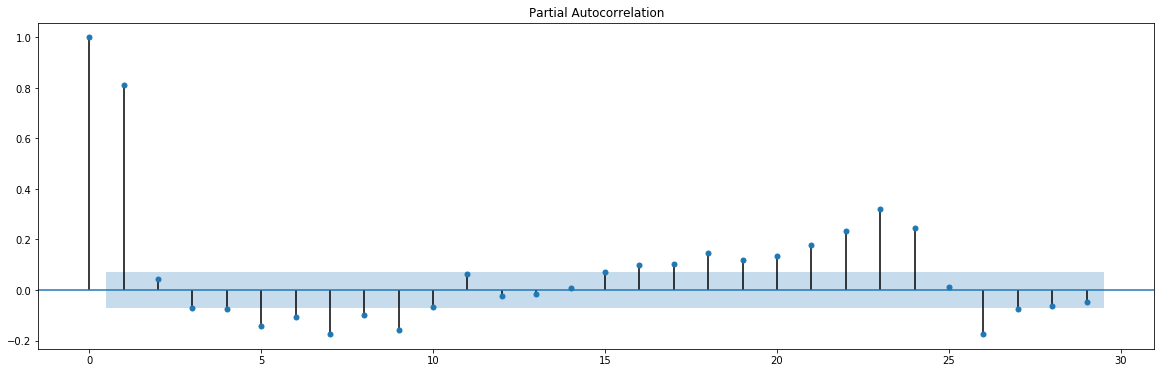

In [91]:
plot_pacf(num['num']).show()

#### AR阶数p
AR的阶数p可以通过pacf图来设定，因为AR各项的系数就代表了各项自变量x对因变量y的偏自相关性。
偏自相关落入了蓝色背景区间内，表示不相关，所以这里阶数可以选择2，或者保守点选择1。

/Users/wangwenqing/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.


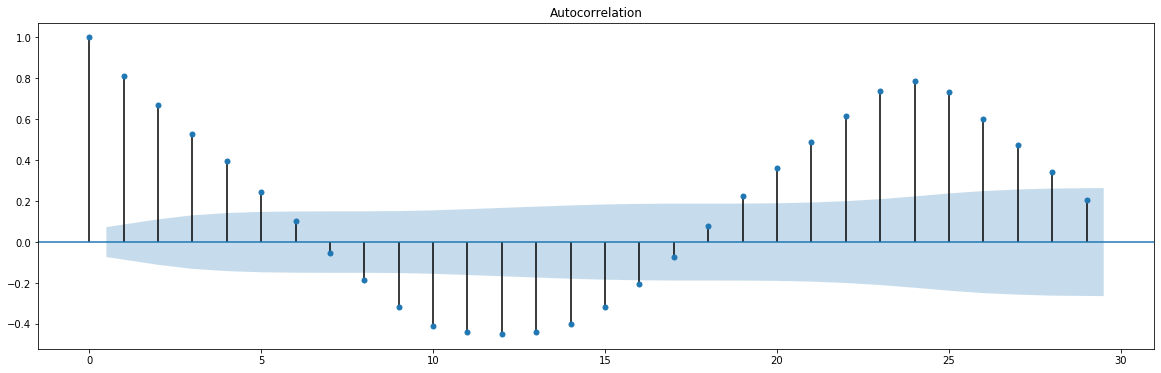

In [94]:
plot_acf(num['num']).show()

#### MA阶数
通过acf图来设定，因为MA是预测误差，预测误差是自回归预测和真实值之间的偏差。定阶过程类似AR阶数的设定过程。这里可以选择3，或者保守点选择2。

### 构建ARIMA模型

In [71]:
from statsmodels.tsa.arima.model import ARIMA

# 0,1,2 ARIMA Model
model = ARIMA(num['num'], order=(0,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    num   No. Observations:                  720
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -2966.130
Date:                Sun, 20 Mar 2022   AIC                           5938.260
Time:                        21:16:43   BIC                           5951.994
Sample:                             0   HQIC                          5943.563
                                - 720                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1332      0.035     -3.856      0.000      -0.201      -0.066
ma.L2          0.0017      0.039      0.043      0.966      -0.075       0.079
sigma2       224.2556     10.244     21.891      0.0

中间的表格列出了训练得到的模型各项和对应的系数，如果系数很小，且‘P>|z|’ 列下的P-Value值远大于0.05，则该项应该去掉，比如上图中的ma部分的第二项，系数是0.0017,P-Value值是0.962,那么可以重建模型为ARIMA(0,1,1)，从下图可以看到，修改阶数后的模型的AIC等信息准则都有所降低：

In [73]:
# 0,1,1 ARIMA Model
model = ARIMA(num['num'], order=(0,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    num   No. Observations:                  720
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -2966.131
Date:                Sun, 20 Mar 2022   AIC                           5936.263
Time:                        21:17:14   BIC                           5945.418
Sample:                             0   HQIC                          5939.797
                                - 720                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1330      0.035     -3.851      0.000      -0.201      -0.065
sigma2       224.2592     10.207     21.971      0.000     204.254     244.265
Ljung-Box (L1) (Q):                   0.00   Jarque-

检查残差

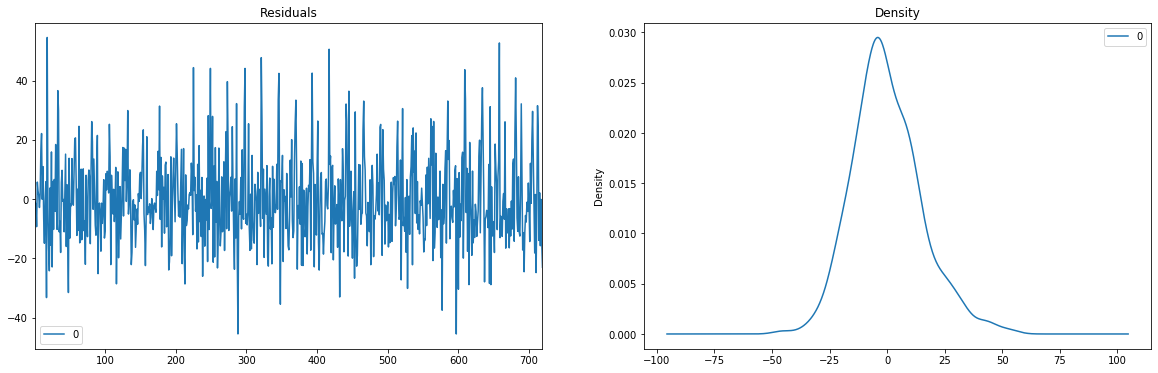

In [103]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

模型拟合

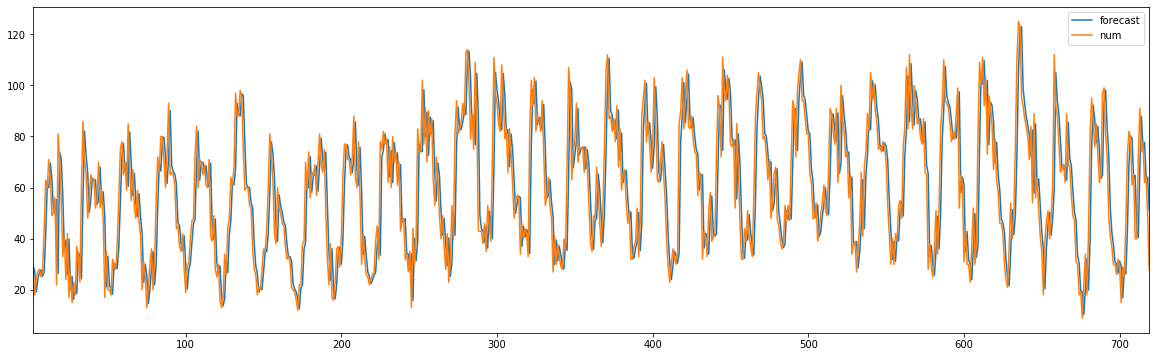

In [104]:
model_fit.plot_predict(dynamic=False)
plt.show()

模型预测

In [82]:
from statsmodels.tsa.arima.model import ARIMA

In [83]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = num['num'][:680]
test = num['num'][680:]

# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(0, 1, 1))  
fitted = model.fit()  

# Forecast
fc, se, conf = fitted.forecast(3, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [ ]:
如果模型带有季节性，则除了p,d,q以外，模型还需要引入季节性部分：

In [121]:
!pip install pmdarima

     |████████████████████████████████| 595 kB 5.4 MB/s            
     |████████████████████████████████| 9.5 MB 4.0 MB/s             
     |████████████████████████████████| 7.8 MB 12.0 MB/s            
     |████████████████████████████████| 16.9 MB 2.9 MB/s             
     |████████████████████████████████| 233 kB 6.3 MB/s            
  Attempting uninstall: numpy
    Found existing installation: numpy 1.17.2
    Uninstalling numpy-1.17.2:
      Successfully uninstalled numpy-1.17.2
  Attempting uninstall: patsy
    Found existing installation: patsy 0.5.1
    Uninstalling patsy-0.5.1:
      Successfully uninstalled patsy-0.5.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.1
    Uninstalling statsmodels-0.10.1:
      Successfully uninstalled statsmodels-0.10.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.21.3
    Uninstalling scikit-learn-0.21.3:
      Successfully uninstalled scikit-learn-0.21.3
ERR

<Figure size 432x288 with 0 Axes>

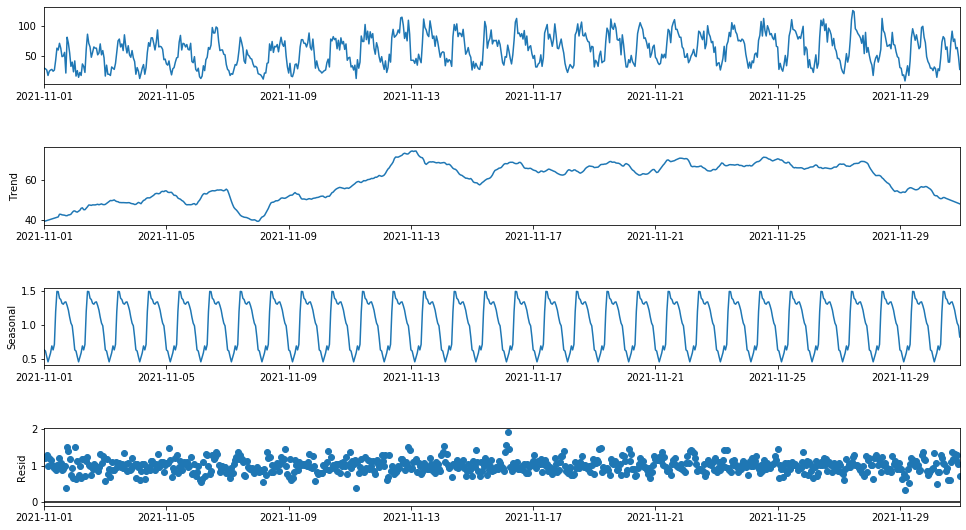

In [49]:
#季节性分解


from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df,model='multiplicative', 
             extrapolate_trend='freq')  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [97]:
#可以分别获得趋势、季节性和随机性
trend = decomposition.trend
seasonal = decomposition.seasonal 
residual = decomposition.resid

In [100]:
#季节平稳性检测

import statsmodels.tsa.stattools as ts

def judge_stationarity(data_sanya_one):
    dftest = ts.adfuller(data_sanya_one)
    print(dftest)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    stationarity = 1
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value 
        if dftest[0] > value:
                stationarity = 0
    print(dfoutput)
    print("是否平稳(1/0): %d" %(stationarity))

stationarity = judge_stationarity(residual)

(-10.706914064329728, 3.4090934941272805e-19, 9, 710, {'1%': -3.439593802573824, '5%': -2.865619356068967, '10%': -2.568942332870462}, -382.68081886201685)
Test Statistic                -1.070691e+01
p-value                        3.409093e-19
#Lags Used                     9.000000e+00
Number of Observations Used    7.100000e+02
Critical Value (1%)           -3.439594e+00
Critical Value (5%)           -2.865619e+00
Critical Value (10%)          -2.568942e+00
dtype: float64
是否平稳(1/0): 1


In [18]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(df, trend='n', order=(0,1,1), seasonal_order=(0,1,1,7))
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                               num   No. Observations:                  720
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 7)   Log Likelihood               -2954.936
Date:                           Mon, 21 Mar 2022   AIC                           5915.872
Time:                                   12:00:21   BIC                           5929.576
Sample:                               11-01-2021   HQIC                          5921.165
                                    - 11-30-2021                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1318      0.035     -3.750      0.000      -0.201      -0.063
ma.S.L7       -0.9966      0.080    -12.441

In [106]:

import warnings
import itertools
#通过网格搜索对seasonal_order进行定阶,目前就是pdq=011，seasonal_order=2, 2, 1, 52效果比较好，RMSE=202.4582
def get_ARIMA_params(data, pdq, m=12):
    p = d = q = range(0, 3)
    seasonal_pdq = [(x[0], x[1], x[2], m) for x in list(itertools.product(p, d, q))]
    score_aic = 1000000.0
    warnings.filterwarnings("ignore") # specify to ignore warning messages
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(data,
                                        order=pdq,
                                        seasonal_order=param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
        results = mod.fit()
        print('x{}12 - AIC:{}'.format(param_seasonal, results.aic))
        if results.aic < score_aic:
            score_aic = results.aic
            params = param_seasonal, results.aic
    param_seasonal, results.aic = params
    print('x{}12 - AIC:{}'.format(param_seasonal, results.aic))
pdq = [0, 1, 1]
get_ARIMA_params(df, pdq, m=52)



x(0, 0, 0, 52)12 - AIC:5921.714617800688
x(0, 0, 1, 52)12 - AIC:5487.594619505582
x(0, 0, 2, 52)12 - AIC:5075.007679065234
x(0, 1, 0, 52)12 - AIC:5932.915359526427
x(0, 1, 1, 52)12 - AIC:5156.90207045451
x(0, 1, 2, 52)12 - AIC:4733.700894997135
x(0, 2, 0, 52)12 - AIC:6113.640212002507
x(0, 2, 1, 52)12 - AIC:5151.635413250365
x(0, 2, 2, 52)12 - AIC:4502.900619130934
x(1, 0, 0, 52)12 - AIC:5503.089050729549
x(1, 0, 1, 52)12 - AIC:5489.56812440436
x(1, 0, 2, 52)12 - AIC:5075.945549979853
x(1, 1, 0, 52)12 - AIC:5342.763661300462
x(1, 1, 1, 52)12 - AIC:5156.043059991183
x(1, 1, 2, 52)12 - AIC:4719.844883492376
x(1, 2, 0, 52)12 - AIC:5334.38653586527
x(1, 2, 1, 52)12 - AIC:5048.200718251998
x(1, 2, 2, 52)12 - AIC:4499.816044430254
x(2, 0, 0, 52)12 - AIC:5091.201769559335
x(2, 0, 1, 52)12 - AIC:5091.780374027247
x(2, 0, 2, 52)12 - AIC:5074.6196118930375
x(2, 1, 0, 52)12 - AIC:4846.3846895642855
x(2, 1, 1, 52)12 - AIC:4763.627002584213
x(2, 1, 2, 52)12 - AIC:4721.744262307236
x(2, 2, 0, 52)12 

In [110]:
!pip install -U numpy
!pip install -U pandas

You should consider upgrading via the '/Users/wangwenqing/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 11.0 MB 6.3 MB/s            
  Attempting uninstall: pandas
    Found existing installation: pandas 0.25.1
    Uninstalling pandas-0.25.1:
      Successfully uninstalled pandas-0.25.1
You should consider upgrading via the '/Users/wangwenqing/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0848      0.046     -1.851      0.064      -0.175       0.005
ar.S.L52       0.0244      0.006      3.768      0.000       0.012       0.037
ma.S.L52      -1.8917      0.058    -32.737      0.000      -2.005      -1.778
ma.S.L104      1.0000      0.064     15.725      0.000       0.875       1.125
sigma2       276.9523      0.000    6.6e+05      0.000     276.951     276.953


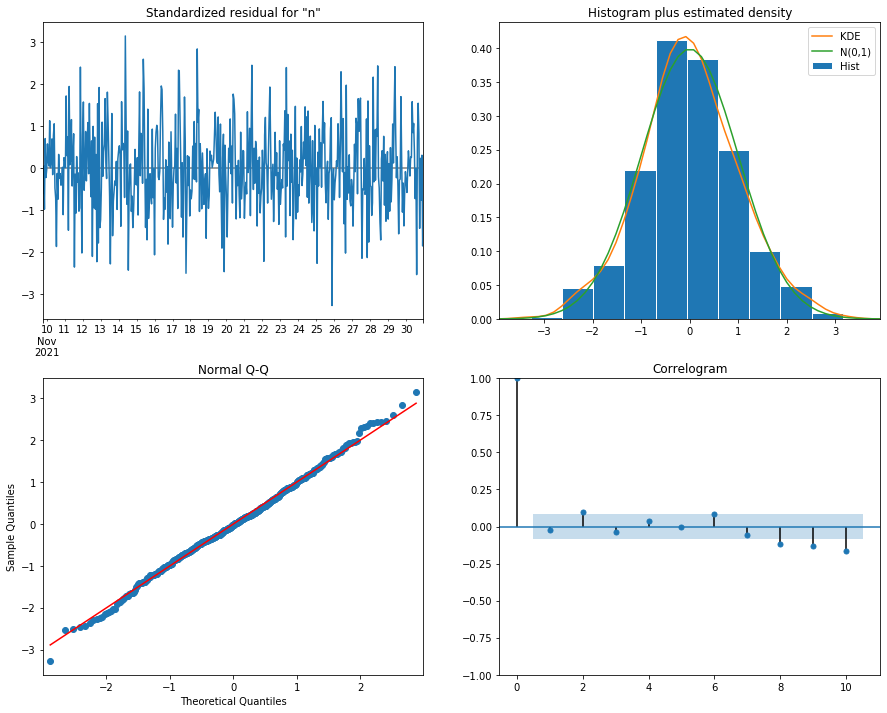

In [17]:
mod = sm.tsa.statespace.SARIMAX(df,
                                order=(0, 1, 1),
                                seasonal_order=(1, 2, 2, 52),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])
results.plot_diagnostics(figsize=(15, 12))
plt.show()



In [84]:
from statsmodels.tsa.stattools import adfuller   #Dickey-Fuller test
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(7).mean()
    rolstd = timeseries.rolling(7).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(25, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')  #autolag : {‘AIC’, ‘BIC’, ‘t-stat’, None}
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

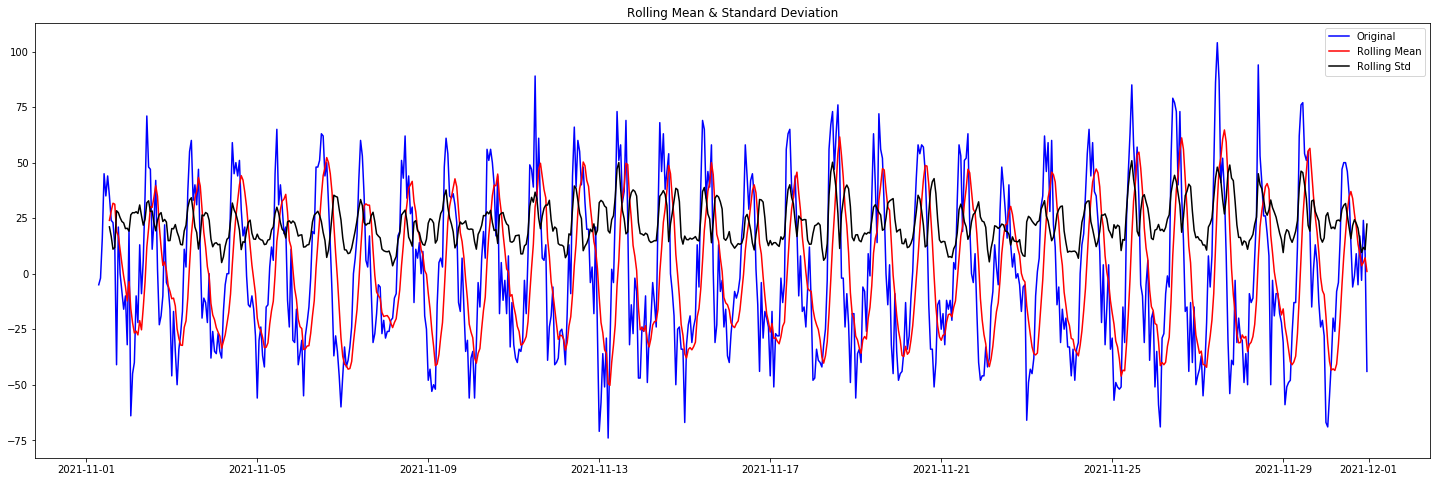

Results of Dickey-Fuller Test:
Test Statistic                -1.278827e+01
p-value                        7.168104e-24
#Lags Used                     2.000000e+01
Number of Observations Used    6.920000e+02
Critical Value (1%)           -3.439835e+00
Critical Value (5%)           -2.865726e+00
Critical Value (10%)          -2.568999e+00
dtype: float64


In [85]:
df['seasonal_difference'] = df - df.shift(7)  
test_stationarity(df.seasonal_difference.dropna(inplace=False))

In [30]:
print(type(num['num']))

<class 'pandas.core.series.Series'>


In [45]:
print(type([num['num']]))

<class 'list'>


In [14]:
df = pd.DataFrame(list(map(list, zip(*[num['num']]))), 
                  columns=['num'],
        index=pd.date_range('2021-11-01', periods=720, freq='H')) 
df.head()

,num
2021-11-01 00:00:00,30
2021-11-01 01:00:00,29
2021-11-01 02:00:00,27
2021-11-01 03:00:00,18
2021-11-01 04:00:00,25


In [15]:
import pmdarima as pm
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(df, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=0, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)
smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=5888.229, Time=0.69 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=6660.288, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=5884.376, Time=0.67 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=6202.474, Time=0.61 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=8041.301, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=5889.493, Time=0.11 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=5750.275, Time=2.42 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=5688.728, Time=3.71 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.31 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=4.06 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=5790.117, Time=4.70 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=5813.340, Time=2.59 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=3.92 sec
 ARIMA(1,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=3.97 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  720
Model:             SARIMAX(1, 0, 0)x(2, 0, [1], 12)   Log Likelihood               -2838.364
Date:                              Mon, 21 Mar 2022   AIC                           5688.728
Time:                                      10:53:14   BIC                           5716.203
Sample:                                           0   HQIC                          5699.335
                                              - 720                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     42.6384      3.297     12.933      0.000      36.177      49.100
ar.L1          0.4455      0.033     13.697      0.000       0.382       0.509
ar.S.L12      -0.6331      0.043    -14.678      0.000      -0.718      -0.549
ar.S.L24       0.3409      0.040      8.475      0.000       0.262       0.420
ma.S.L12       0.7907      0.038     20.975      0.000       0.717       0.865
sigma2       153.4306      7.911     19.394      0.000     137.925     168.936
===================================================================================
Ljung-Box (L1) (Q):                   0.44   Jarque-Bera (JB):                15.78
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):               1.15   Skew:                             0.34
Prob(H) (two-sided):                  0.28   Kurtosis:                         3.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:

fitted = smodel.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(40, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

TypeError: fit() missing 1 required positional argument: 'y'

In [84]:
D_data

1      -1.0
2      -2.0
3      -9.0
4       7.0
5       2.0
       ... 
715     4.0
716   -16.0
717     2.0
718   -15.0
719   -21.0
Name: num, Length: 719, dtype: float64

单位根统计量对应的p的值显著小于0.05，最终判断该序列是平稳序列的

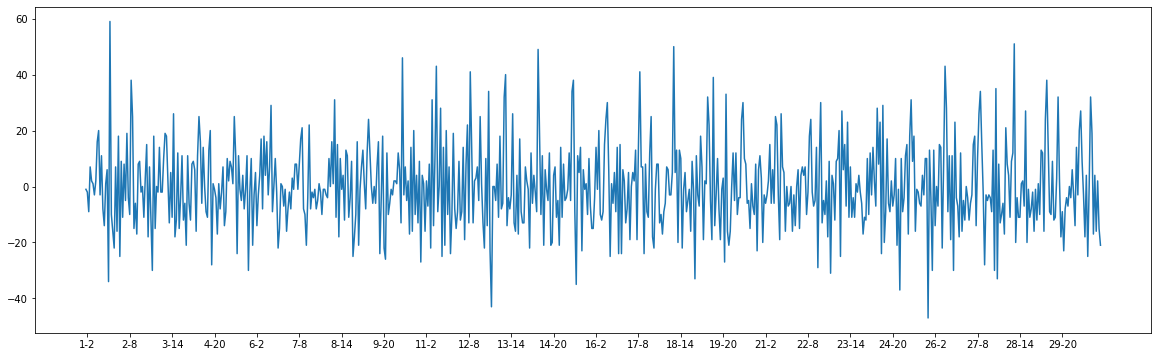

In [88]:
#1阶差分后的结果
D_data = num['num'].diff().dropna()   #1阶差分，丢弃na值
D_data.columns = ['运力差分']  #更改列名

plt.xticks(range(1,719,30))
plt.plot(num['time'][1:],D_data)
# D_data.plot() #时序图

/Users/wangwenqing/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.


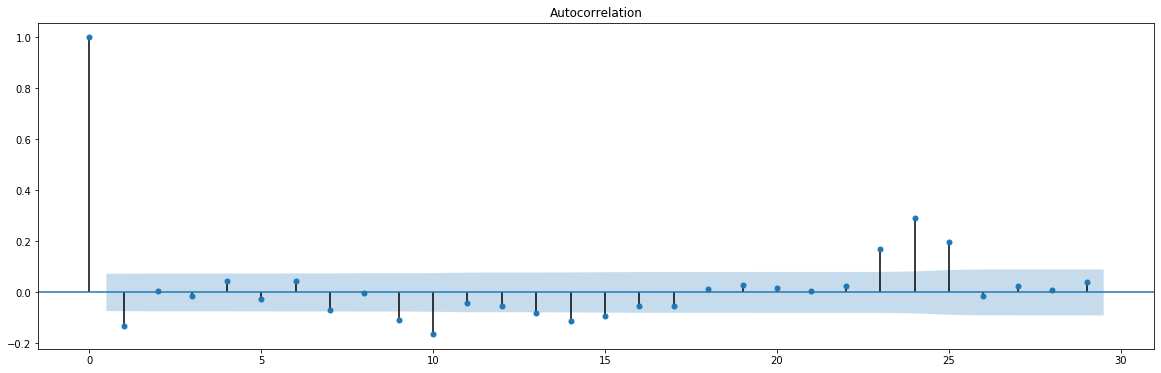

In [89]:
plot_acf(D_data).show()

ValueError: setting an array element with a sequence.

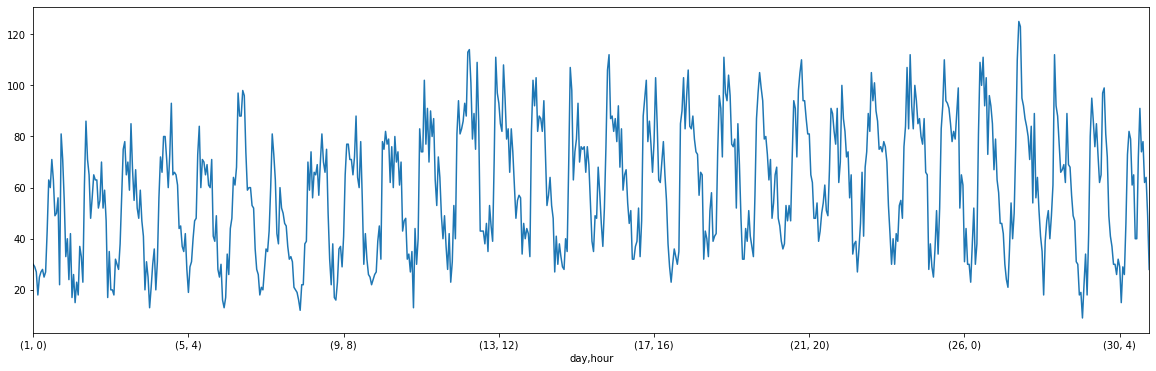

In [71]:
import matplotlib.pyplot as plt

groups['waybill_no'].plot(kind='line')
num_window = groups.rolling(window=10).mean()
plt.plot(num_window)